In [ ]:
#!pip install -r "/content/drive/MyDrive/Colab Notebooks/LEVX_1km/requirements.txt"

In [ ]:
#pip install lazypredict

In [1]:
#@title Load coordinates nearest points
import plotly.express as px
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import time
from sklearn.pipeline import Pipeline
import pickle
from scipy.stats import chi2_contingency

pd.options.display.max_rows = 999


coor=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LEBL/input_files/distan_lat41.296lon2.078p2R12Km.csv")
px.set_mapbox_access_token("pk.eyJ1IjoiZ3JhbmFudHVpbiIsImEiOiJja3B4dGU4OTkwMTFmMm9ycnNhMjJvaGJqIn0.VWzx_PkD9A5cSUVsn_ijCA")
px.scatter_mapbox(coor, hover_data=['distance'],lat='lat', lon='lon',color='distance', title="Nearest points",
                           color_continuous_scale=px.colors.cyclical.IceFire,)

In [2]:
station = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LEBL/input_files/LEBLY2018Y2022.csv",
                          usecols =["time","skyl1_o"],
                          parse_dates=["time"]).dropna().set_index("time")
station

skyl1_o
time                       
2018-01-01 00:00:00   610.0
2018-01-01 00:30:00   610.0
2018-01-01 01:00:00   610.0
2018-01-01 01:30:00   610.0
2018-01-01 02:00:00   610.0
...                     ...
2022-12-30 21:30:00       M
2022-12-30 22:00:00  1524.0
2022-12-30 22:30:00       M
2022-12-30 23:00:00       M
2022-12-30 23:30:00       M

[87997 rows x 1 columns]

In [3]:
#@title Load station (Cloud level 1 height). Load meteorological model forecast D0.
station = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LEBL/input_files/LEBLY2018Y2022.csv",
                          usecols =["time","skyl1_o"],
                          parse_dates=["time"]).dropna().set_index("time")
#clouds height meters to feet
num = pd.to_numeric(station.skyl1_o, errors="coerce")*3.28084

#label more or less than 200 feet
interval = pd.IntervalIndex.from_tuples([(-1, 300),(300,7000)])
labels = ["<=300ft",">300ft"]


station["skyl1_l"] = pd.cut(num, bins=interval,retbins=False,labels=labels)
station["skyl1_l"] = station["skyl1_l"].map({a:b for a,b in zip(interval,labels)})
station["skyl1_l"] = station["skyl1_l"].astype(str).replace("nan","No Cloud")
station["skyl1_l"] = pd.Categorical(station["skyl1_l"])
print("\nCloud height frequencies")
display(station["skyl1_l"].value_counts(normalize=True).map(lambda n: '{:.1%}'.format(n)))

#Load
mody2018 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LEBL/input_files/lat41.296lon2.078p2R12KmD0Y2018.csv",parse_dates=["time"])
mody2019 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LEBL/input_files/lat41.296lon2.078p2R12KmD0Y2019.csv",parse_dates=["time"])
mody2020 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LEBL/input_files/lat41.296lon2.078p2R12KmD0Y2020.csv",parse_dates=["time"])

model = pd.concat([mody2018,mody2019,mody2020]).drop(columns=["Unnamed: 0"]).set_index("time")

#concat station file versus meteorological model file same time
df_all = pd.concat([station,model],axis=1).drop(columns=["skyl1_o"]).dropna()






Cloud height frequencies


>300ft      69.7%
No Cloud    29.9%
<=300ft      0.4%
Name: skyl1_l, dtype: object

Round 0


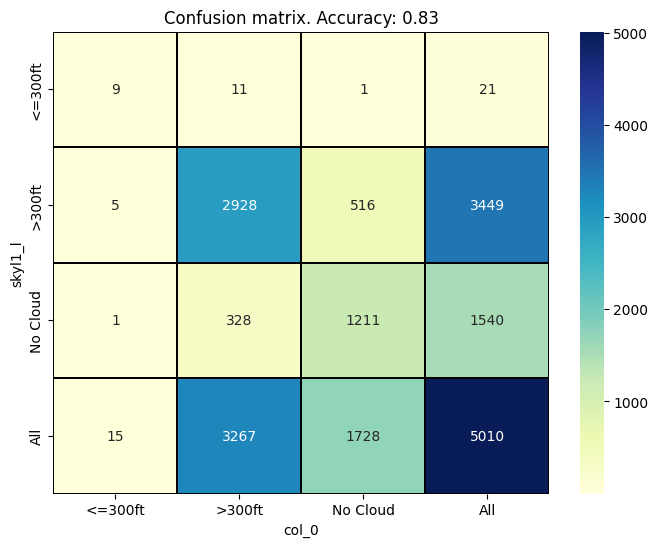

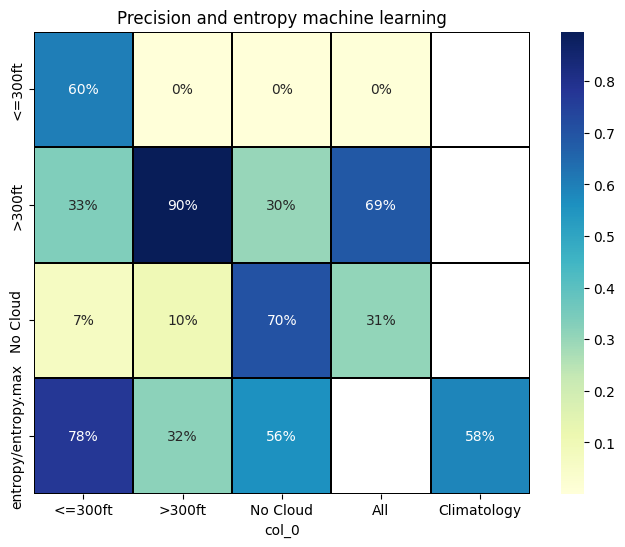

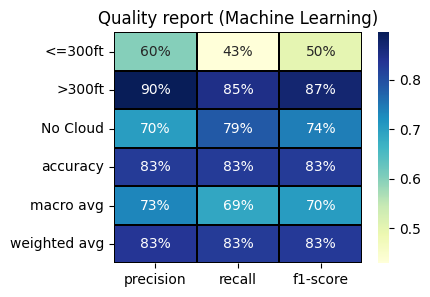

feature feature_per
52    dayofyear        4.3%
32          rh1        3.5%
34       lhflx1        3.3%
50         hour        3.1%
35       lwflx1        3.1%
5         mslp0        3.0%
7           rh0        2.8%
8   visibility0        2.8%
24        T8500        2.7%
41         cin1        2.6%

Round 1


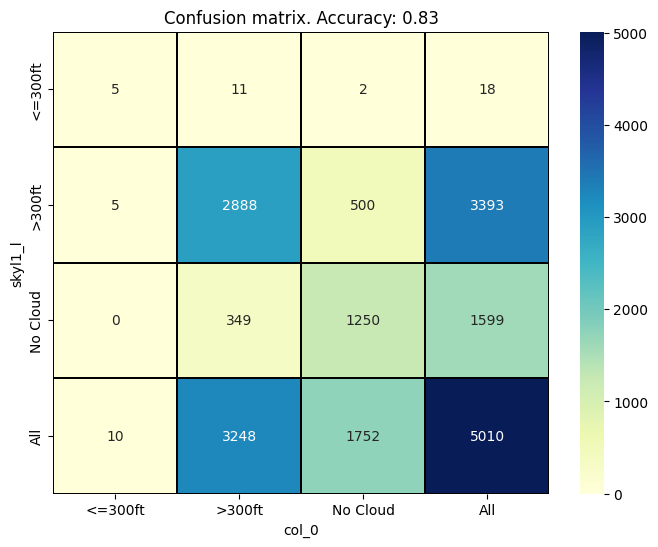

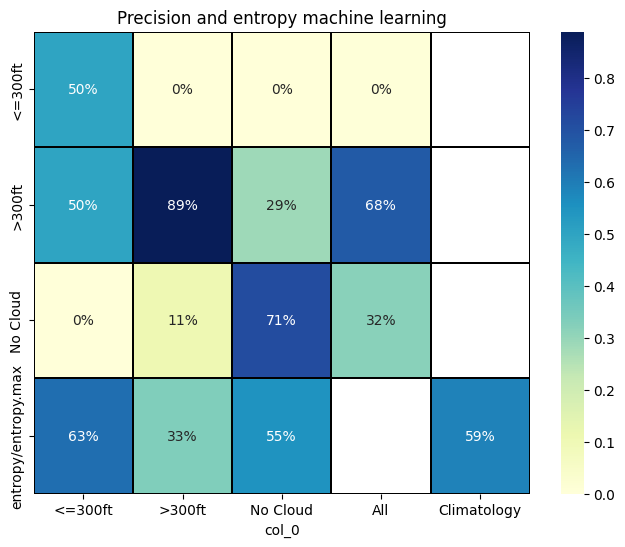

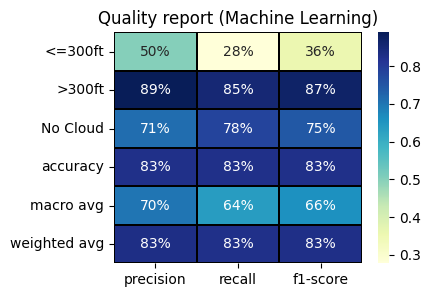

feature feature_per
52    dayofyear        4.5%
35       lwflx1        3.6%
32          rh1        3.5%
34       lhflx1        3.0%
23        T5000        2.8%
25         dir1        2.8%
50         hour        2.8%
8   visibility0        2.7%
14       shflx0        2.7%
31        temp1        2.7%

Round 2


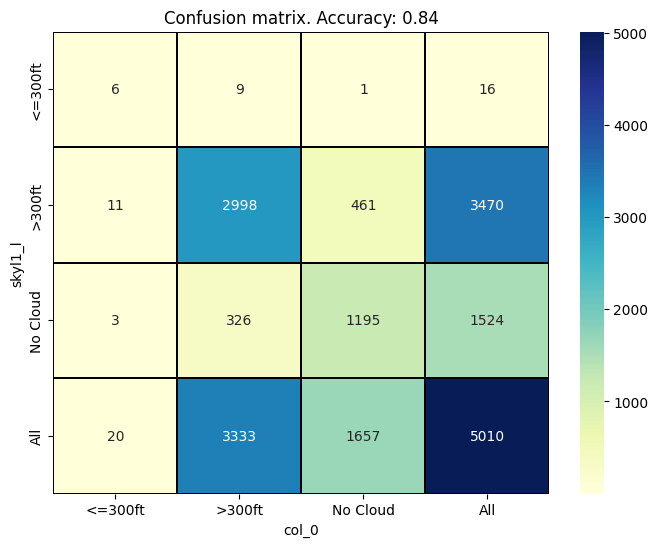

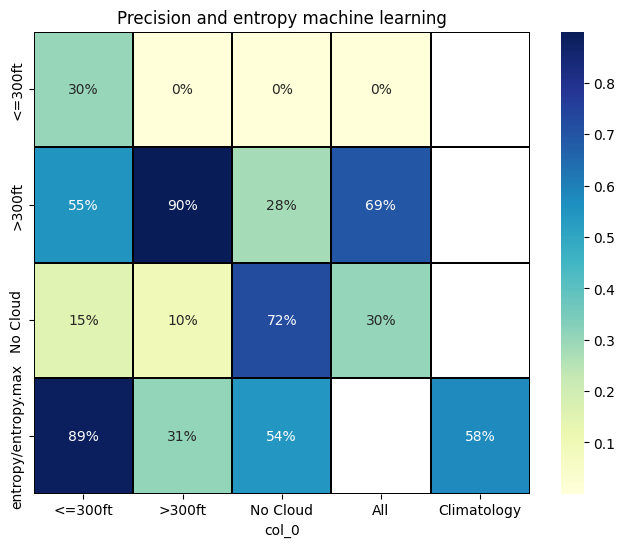

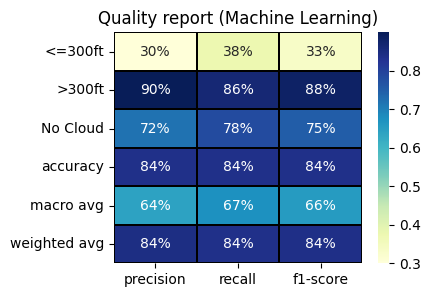

feature feature_per
52    dayofyear        5.1%
50         hour        3.4%
34       lhflx1        3.2%
32          rh1        3.1%
39       shflx1        3.0%
35       lwflx1        2.9%
8   visibility0        2.8%
31        temp1        2.8%
5         mslp0        2.8%
22      HGT8500        2.7%

Round 3


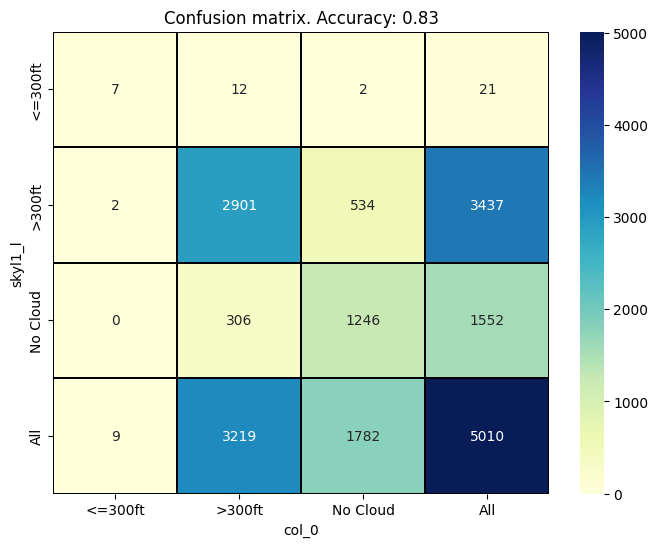

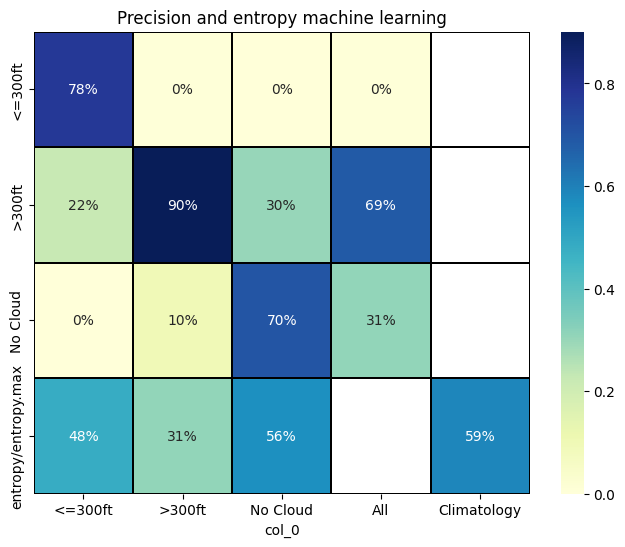

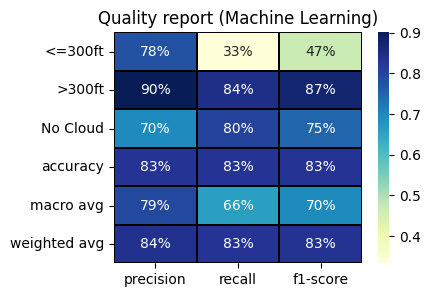

feature feature_per
52    dayofyear        4.4%
32          rh1        3.3%
50         hour        2.9%
8   visibility0        2.9%
35       lwflx1        2.9%
34       lhflx1        2.8%
24        T8500        2.7%
25         dir1        2.7%
5         mslp0        2.7%
7           rh0        2.7%

Round 4


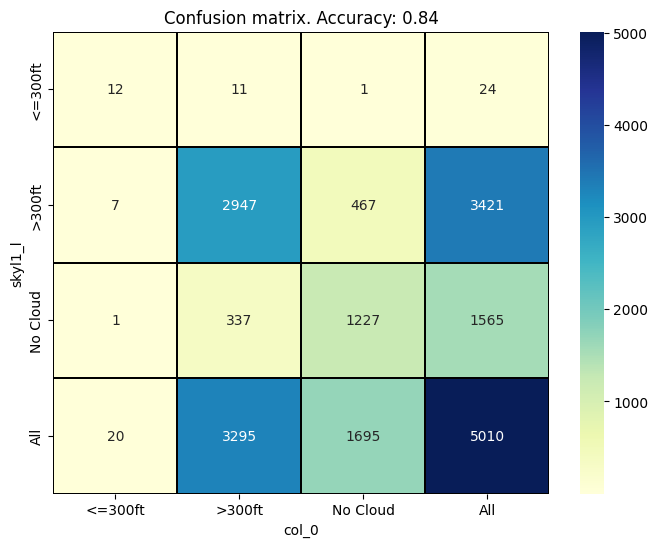

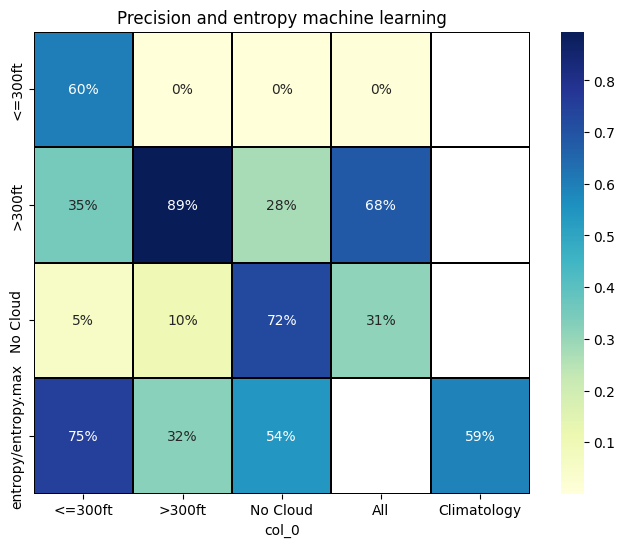

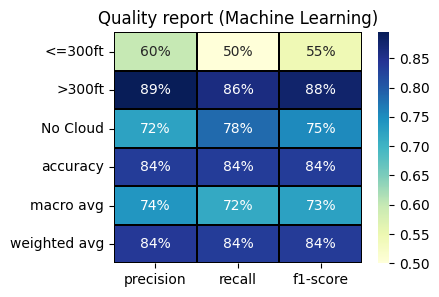

feature feature_per
52    dayofyear        4.7%
32          rh1        3.4%
35       lwflx1        3.3%
8   visibility0        3.3%
50         hour        3.0%
23        T5000        3.0%
25         dir1        2.9%
34       lhflx1        2.8%
24        T8500        2.8%
7           rh0        2.8%

Round 5


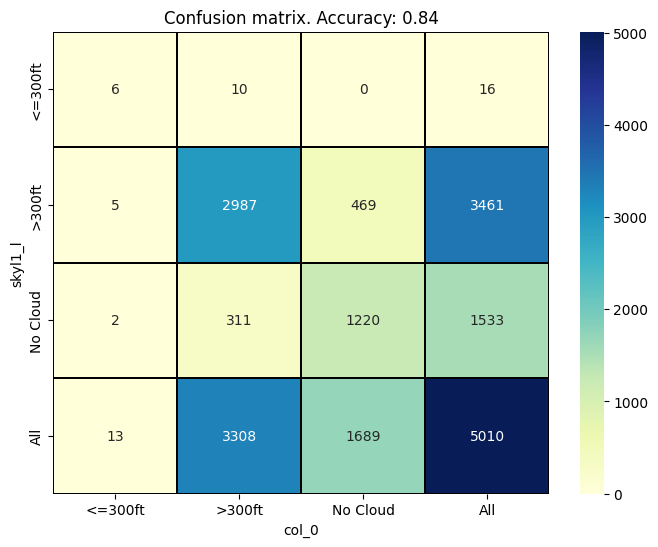

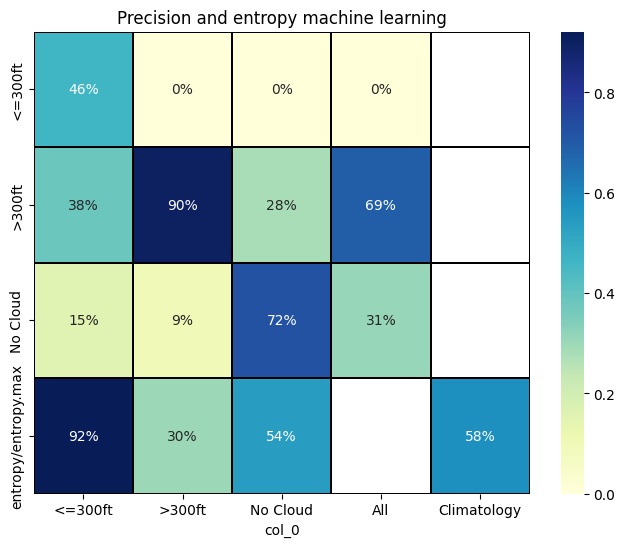

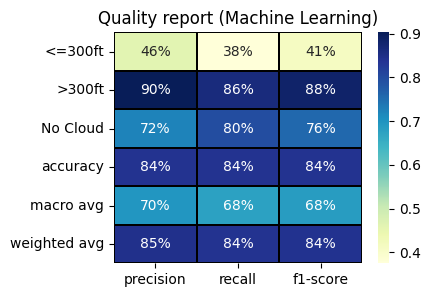

feature feature_per
52    dayofyear        4.9%
32          rh1        3.4%
35       lwflx1        3.3%
50         hour        3.3%
34       lhflx1        3.0%
8   visibility0        2.9%
7           rh0        2.8%
24        T8500        2.8%
0          dir0        2.7%
23        T5000        2.7%

Round 6


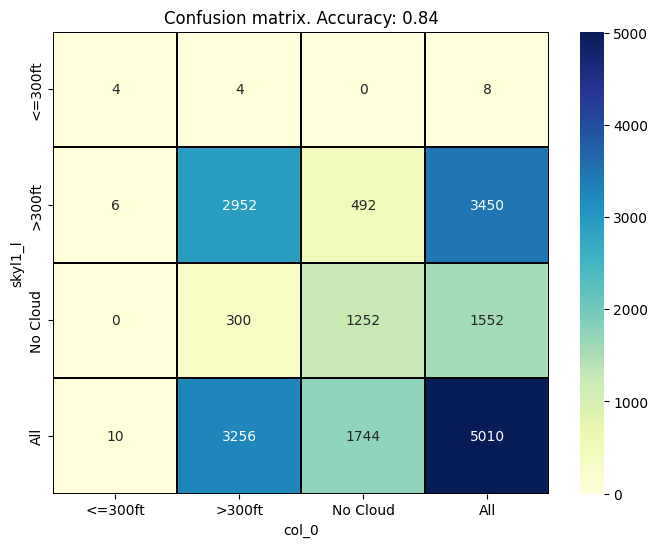

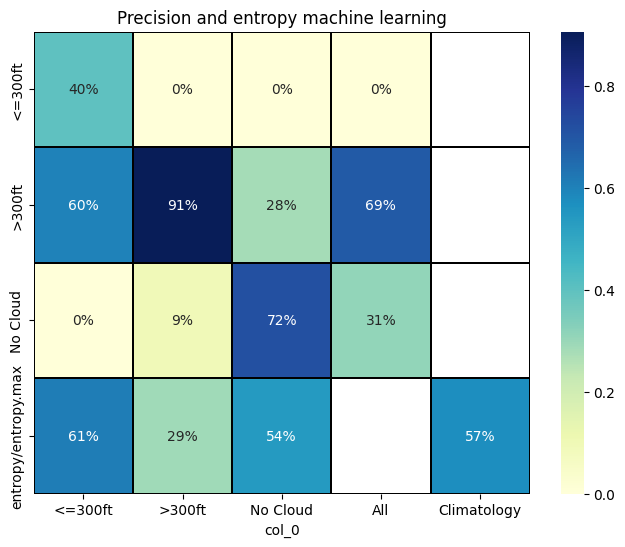

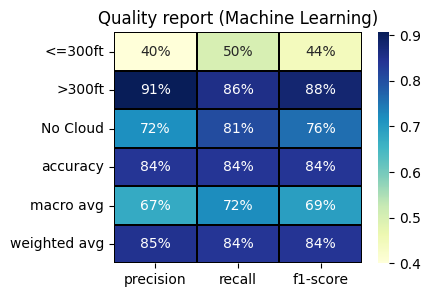

feature feature_per
52    dayofyear        4.6%
32          rh1        3.7%
35       lwflx1        3.3%
8   visibility0        3.1%
34       lhflx1        3.1%
50         hour        3.0%
23        T5000        2.9%
21      HGT5000        2.7%
49        T8501        2.7%
31        temp1        2.7%

Round 7


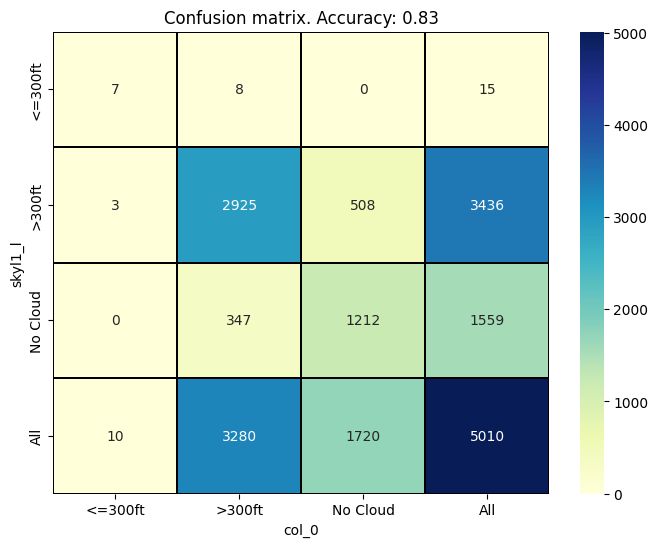

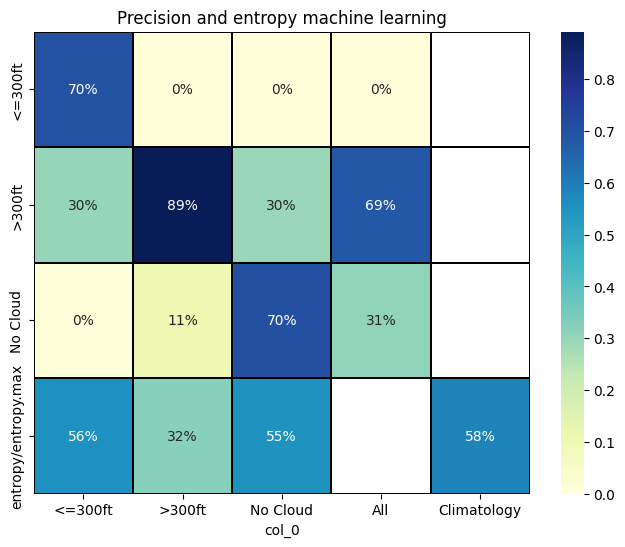

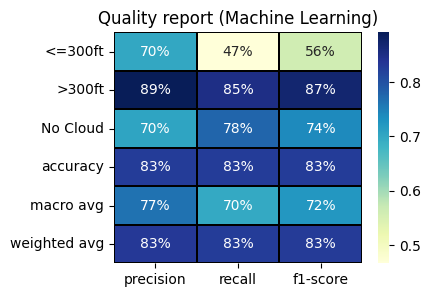

feature feature_per
52    dayofyear        4.3%
32          rh1        3.4%
35       lwflx1        3.3%
49        T8501        3.1%
50         hour        3.0%
34       lhflx1        2.9%
7           rh0        2.8%
8   visibility0        2.8%
39       shflx1        2.7%
24        T8500        2.6%

Round 8


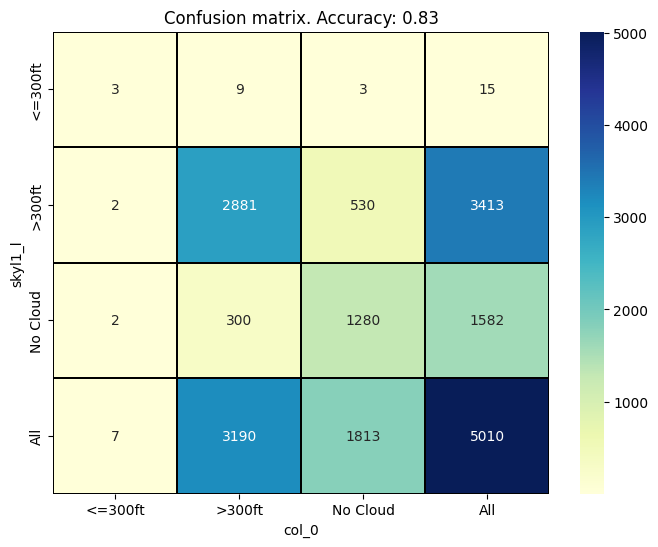

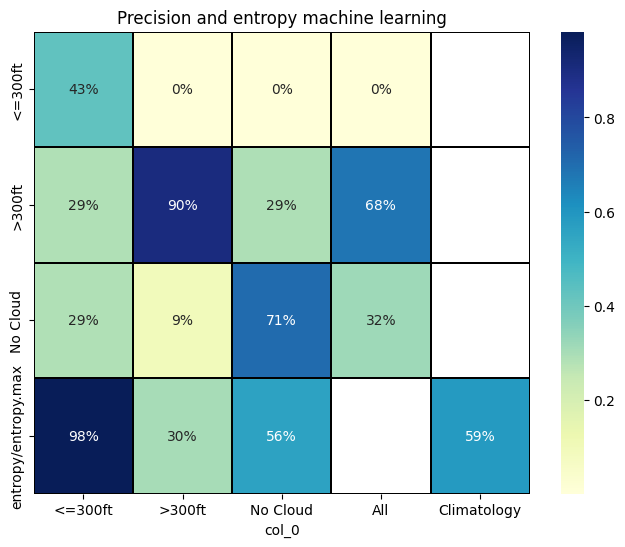

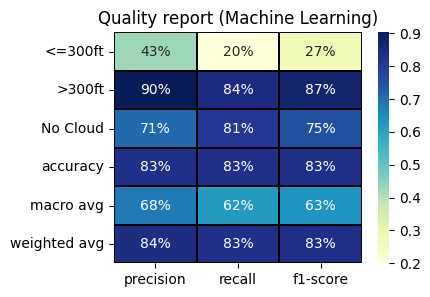

feature feature_per
52    dayofyear        4.5%
32          rh1        3.6%
35       lwflx1        3.2%
50         hour        3.1%
34       lhflx1        2.9%
7           rh0        2.8%
25         dir1        2.8%
21      HGT5000        2.8%
24        T8500        2.7%
8   visibility0        2.6%

Round 9


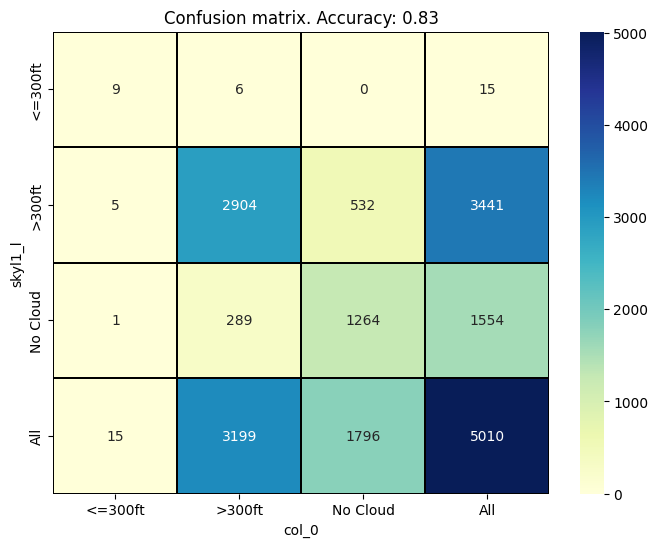

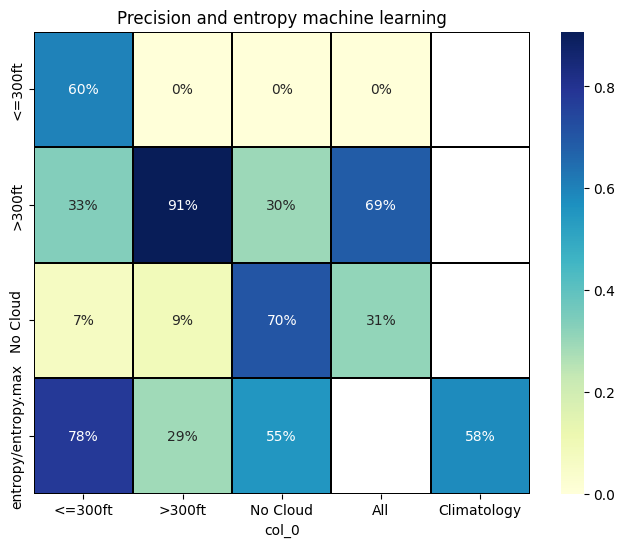

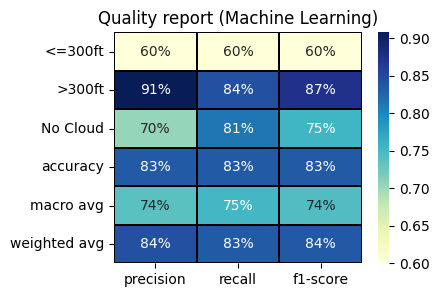

feature feature_per
52    dayofyear        4.7%
32          rh1        3.5%
50         hour        3.5%
8   visibility0        3.4%
35       lwflx1        3.0%
23        T5000        2.9%
34       lhflx1        2.8%
25         dir1        2.7%
7           rh0        2.7%
5         mslp0        2.6%


Accuracy stadistics
        Accuracy
count  10.000000
mean    0.834000
std     0.005164
min     0.830000
25%     0.830000
50%     0.830000
75%     0.840000
max     0.840000
Shapiro test normality
p value: 0.00016868000966496766
Reject null Hypothesis. Alternative hypothesis variable HSS no normal distribution in samples
chi2_contingency last round
p-value: 3.03733013592667e-219
Significance level: 0.01
Degres of of freedom:  1
Stadistic 998.9500283845905
Reject H0,There is an association between machine learning forecast and observed values
Execution time: 1.43 minutes


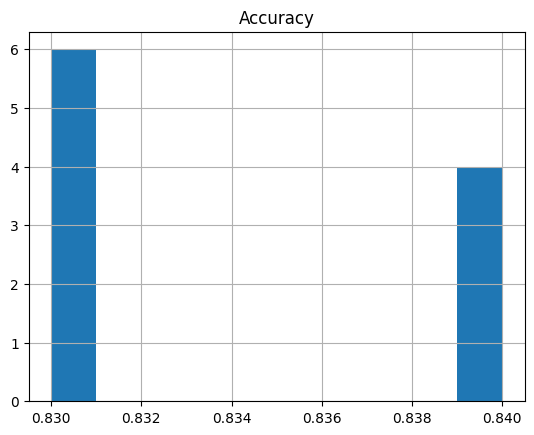

In [4]:
#@title ML LGBMClassifier. Samples 10. Heidke Skill score.

from lightgbm.sklearn import LGBMClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
from scipy.stats import shapiro
import math
from scipy.stats import entropy
from sklearn.metrics import accuracy_score

start_time = time.time()

df_all["hour"] = df_all.index.hour
df_all["month"] = df_all.index.month
df_all["dayofyear"] = df_all.index.dayofyear
df_all["weekofyear"] = df_all.index.isocalendar().week.astype(int)

#random seed 1
np.random.seed(31)

# X and Y
Y = df_all.skyl1_l
X = df_all.iloc[:,1:]


# loop random
acc_ml = []
for t in range (0,10):
  print("Round",t)
  #split variables
  X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, )

  # Resample
  X_res, y_res = SMOTE().fit_resample(X_train,y_train)

  #train model
  ml_model = LGBMClassifier(n_estimators=200).fit(X_res,y_res)
  y_pred = ml_model.predict(X_test)
  acc_ml.append(round(accuracy_score(y_test, y_pred),2))
  #Confusion matrix
  cm = pd.crosstab(y_test, ml_model.predict(X_test),margins=True,)

  plt.figure(figsize=(8, 6))
  plt.title("Confusion matrix. Accuracy: {}".format(round(acc_ml[t],2)))
  seab = sns.heatmap(cm,annot=True,cmap="YlGnBu",fmt='.0f',linewidths=.2,linecolor='black');
  plt.show()

  #Precision and entropy
  plt.figure(figsize=(8, 6))
  plt.title("Precision and entropy machine learning")

  column_sc = pd.crosstab(y_test, ml_model.predict(X_test), margins=True,normalize="columns")
  entropy_values = pd.DataFrame(
    entropy(column_sc, base=2) / (math.log2(column_sc.shape[0])),
    columns=["entropy/entropy.max"],
    index=column_sc.columns).T
  column_sc = pd.concat([column_sc, entropy_values.rename(columns={"All": "Climatology"})])
  seab = sns.heatmap(column_sc,annot=True,cmap="YlGnBu",fmt='.0%',linewidths=.2,linecolor='black');
  plt.show()

  #quality report
  plt.figure(figsize=(4, 3))
  plt.title("Quality report (Machine Learning)")
  qr = pd.DataFrame(classification_report(y_test, ml_model.predict(X_test),output_dict=True)).T
  seab = sns.heatmap(qr.iloc[:,:-1],annot=True,cmap="YlGnBu",fmt='.0%',linewidths=.2,linecolor='black');
  plt.show()

  #feature importance
  def format_as_percentage(value):
      return '{:.1%}'.format(value)
  fea_imp =pd.DataFrame({"feature":X.columns,
                      "importance":[(importance/(sum(ml_model.feature_importances_))) for importance in ml_model.feature_importances_]})
  fea_imp["feature_per"] =  fea_imp['importance'].map(format_as_percentage)
  fea_sort = fea_imp.sort_values(by="importance",ascending=False)
  display(fea_sort[["feature","feature_per"]][:10])



print("\nAccuracy stadistics")
# if p-value is lower than 5%, we can reject the null hypothesis of the normality of the dataset

print(pd.DataFrame(acc_ml,columns=["Accuracy"]).describe())

#sample less 5000
sta, p = shapiro(acc_ml)
print("Shapiro test normality")
print("p value:",p)
#significance level alpha=0.01
alpha = 0.01
if p>alpha:
  print("Accept null hypothesis: normal distribution variable HSS in the samples")
else:
  print("Reject null Hypothesis. Alternative hypothesis variable HSS no normal distribution in samples")



pd.DataFrame(acc_ml,columns=["Accuracy"]).hist();

#stadistic(sta), pvalue (p), degrees of freedom (dof) and expected values (exp)
print("chi2_contingency last round")
sta, p, dof, exp = chi2_contingency(cm.iloc[0:2,0:2])

#degrees of freedoom (rows-1)*(columns-1) to test associationbetween two variables
alpha = 0.01
print('p-value:',p)
print('Significance level:',alpha)
print('Degres of of freedom: ',dof)
print("Stadistic",sta)

if p<=alpha:
    print("Reject H0,There is an association between machine learning forecast and observed values")
else:
    print("Retain H0,There is no association between machine learning forecast and observed values")

#time
end_time = time.time()
execution_time = end_time - start_time
print("Execution time:", round(execution_time/60,2), "minutes")




In [5]:
#@title Save last algorithm round 9


x_var = X.columns
score = {"acc_ml":acc_ml[-1]}
estimators = [('ml_model', ml_model)]
pipe = Pipeline(estimators)

al_file={"x_var":x_var,"coor":coor,"pipe":pipe,"score":score}
pickle.dump(al_file, open("/content/drive/MyDrive/Colab Notebooks/LEBL/algorithms/skyl1_LEBL_d0.al", 'wb'))

Round 0


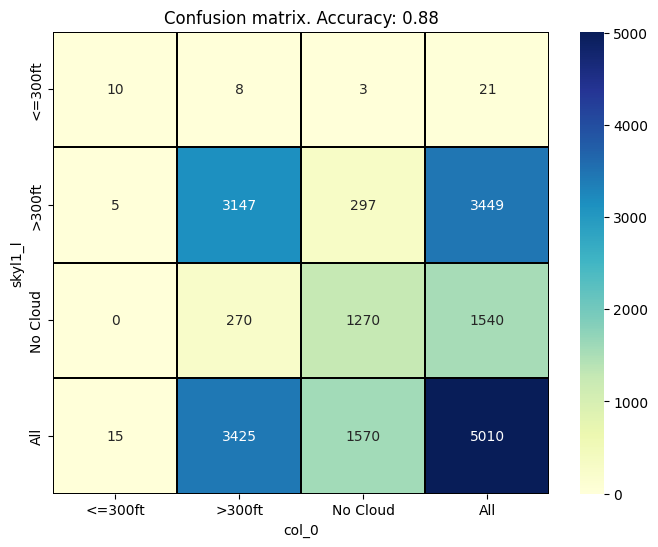

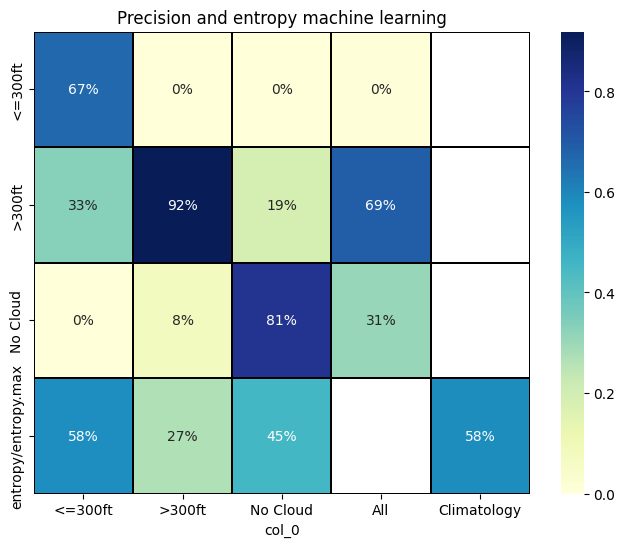

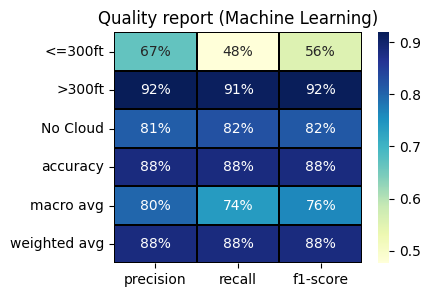

feature feature_per
32          rh1        4.5%
53   weekofyear        3.9%
52    dayofyear        3.7%
51        month        3.4%
33  visibility1        3.3%
7           rh0        2.9%
49        T8501        2.8%
31        temp1        2.7%
46      HGT5001        2.7%
21      HGT5000        2.6%

Round 1


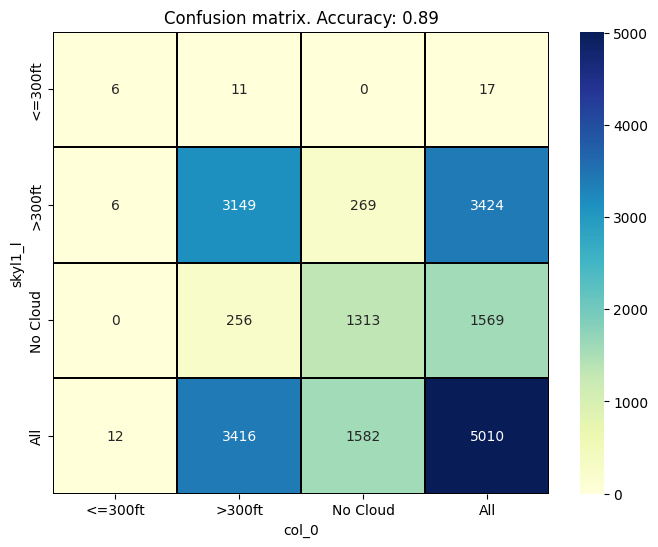

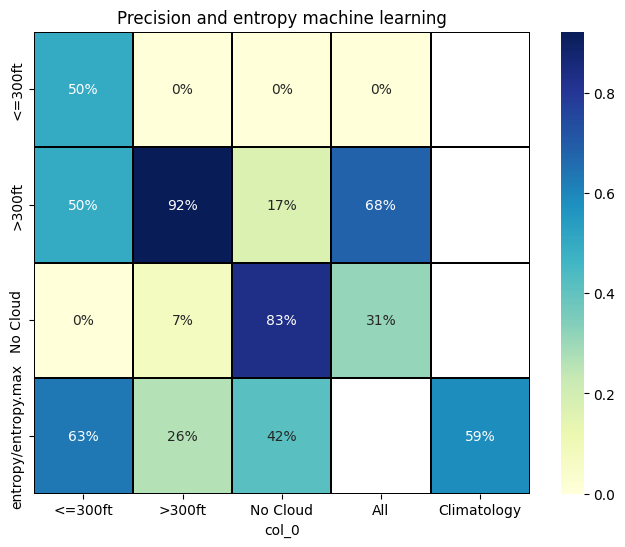

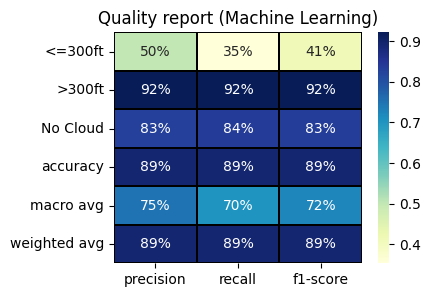

feature feature_per
32          rh1        4.7%
51        month        3.8%
33  visibility1        3.4%
52    dayofyear        3.2%
34       lhflx1        3.1%
53   weekofyear        2.9%
21      HGT5000        2.8%
24        T8500        2.7%
49        T8501        2.7%
46      HGT5001        2.6%

Round 2


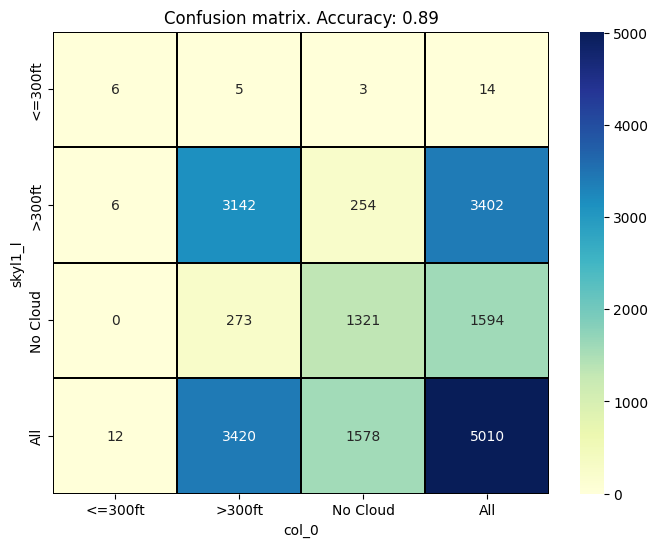

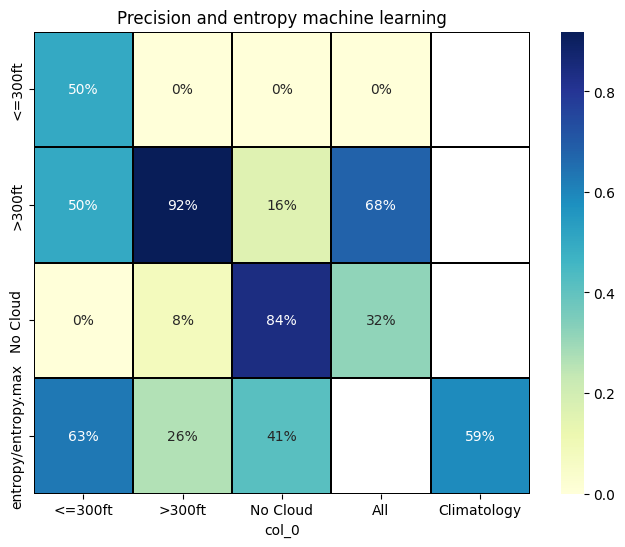

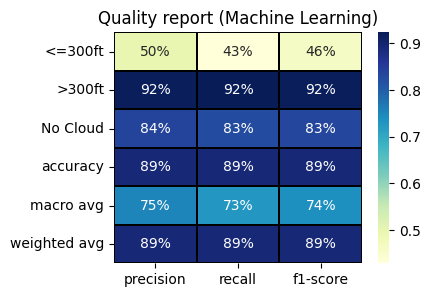

feature feature_per
32          rh1        4.4%
52    dayofyear        3.9%
53   weekofyear        3.8%
51        month        3.7%
33  visibility1        3.3%
34       lhflx1        2.8%
24        T8500        2.7%
49        T8501        2.7%
46      HGT5001        2.6%
31        temp1        2.5%

Round 3


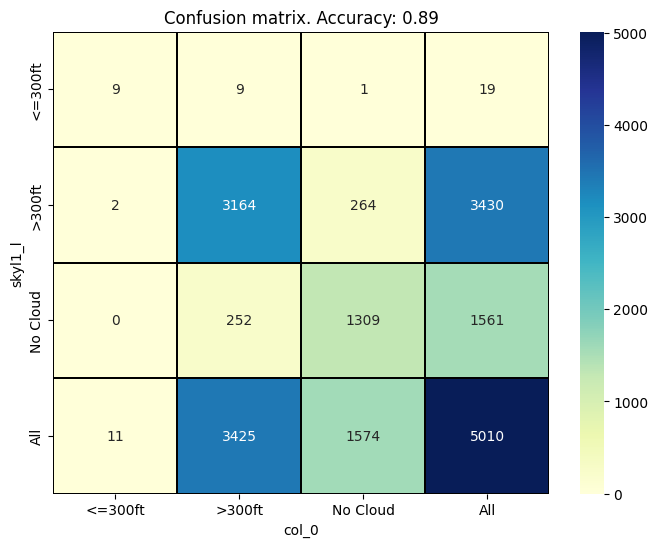

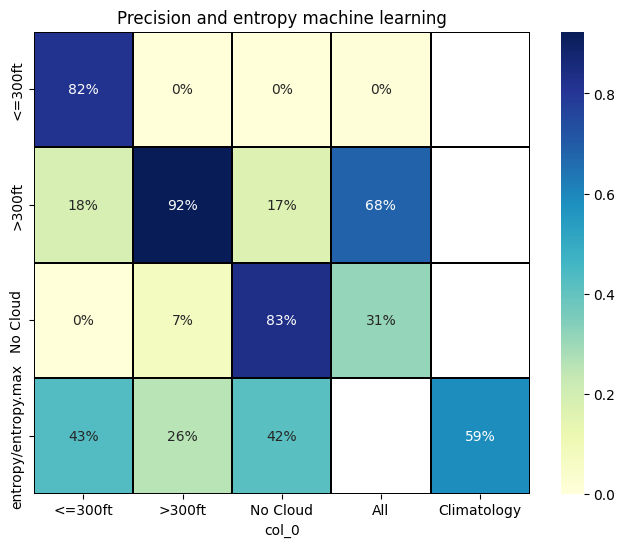

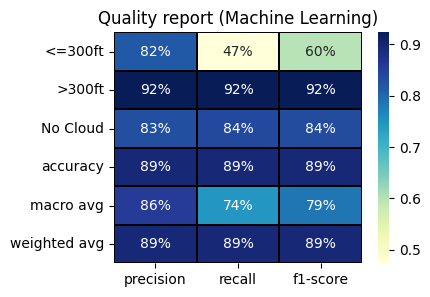

feature feature_per
33  visibility1        4.6%
32          rh1        4.5%
51        month        3.6%
34       lhflx1        3.3%
52    dayofyear        3.3%
53   weekofyear        2.9%
8   visibility0        2.9%
24        T8500        2.7%
46      HGT5001        2.6%
35       lwflx1        2.5%

Round 4


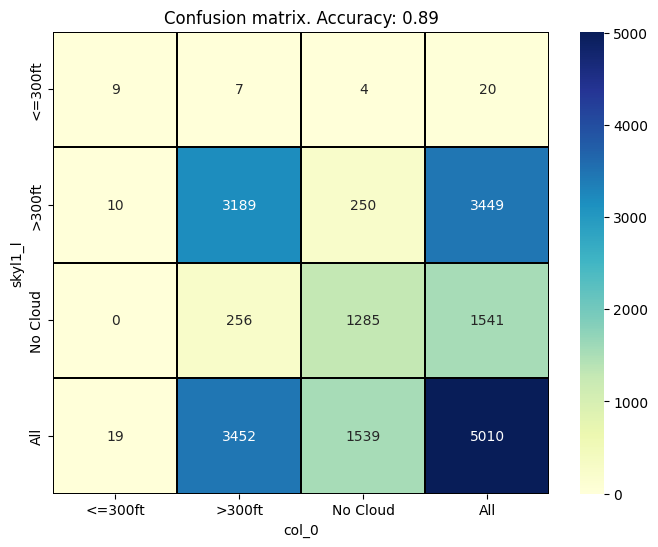

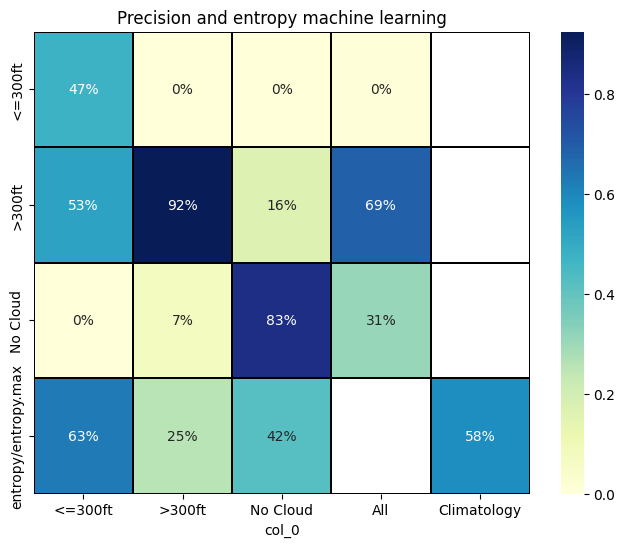

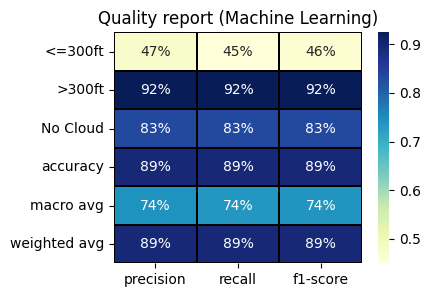

feature feature_per
51        month        3.9%
32          rh1        3.6%
53   weekofyear        3.4%
52    dayofyear        3.4%
34       lhflx1        3.2%
33  visibility1        3.2%
8   visibility0        3.0%
21      HGT5000        2.9%
46      HGT5001        2.7%
47      HGT8501        2.6%

Round 5


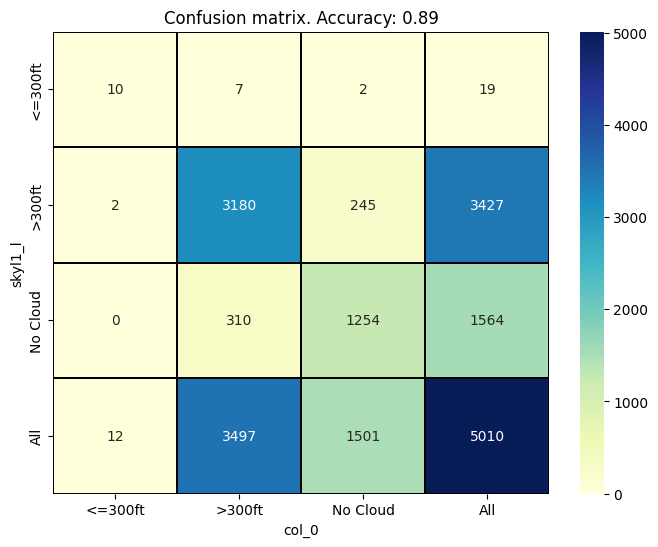

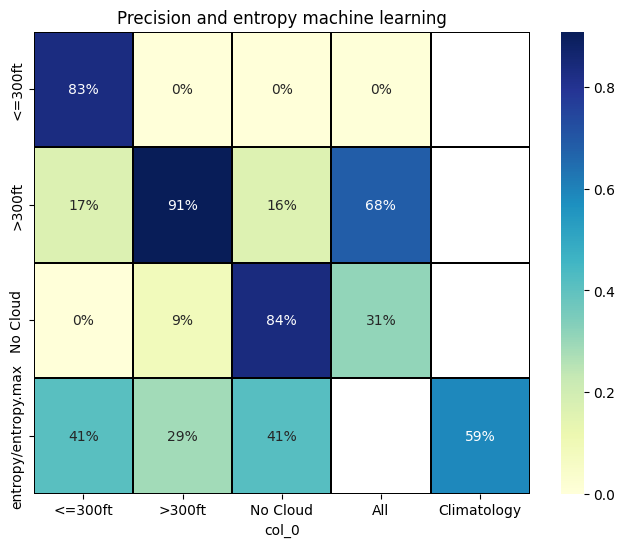

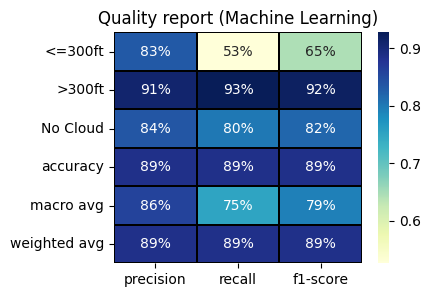

feature feature_per
32          rh1        4.5%
51        month        3.8%
33  visibility1        3.5%
53   weekofyear        3.4%
52    dayofyear        3.4%
34       lhflx1        3.0%
21      HGT5000        2.8%
7           rh0        2.6%
24        T8500        2.5%
50         hour        2.5%

Round 6


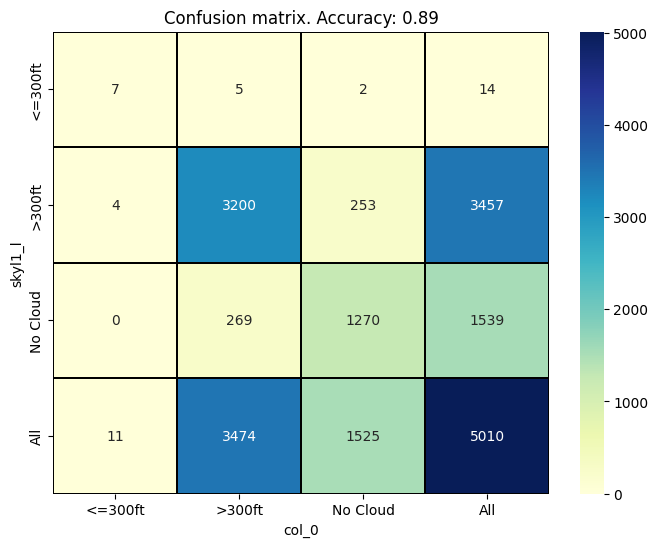

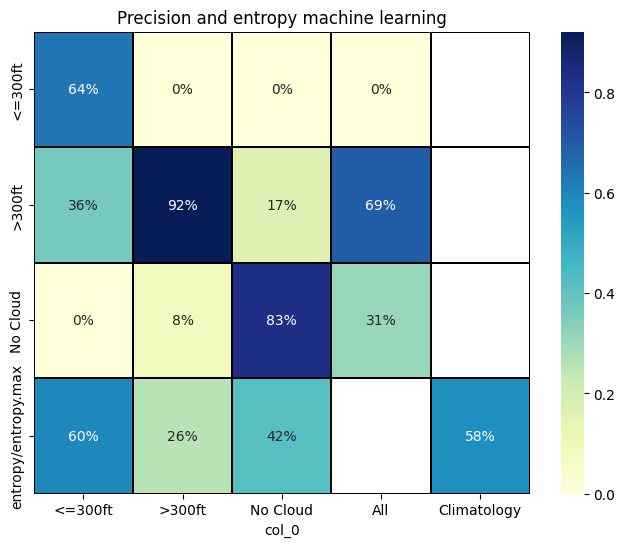

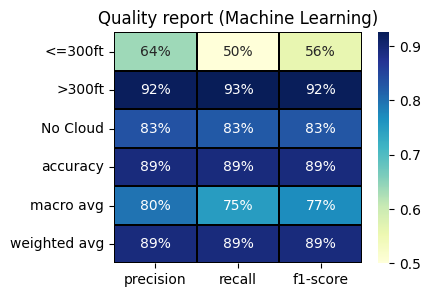

feature feature_per
32          rh1        4.1%
52    dayofyear        3.7%
53   weekofyear        3.6%
51        month        3.6%
49        T8501        2.9%
33  visibility1        2.9%
7           rh0        2.8%
34       lhflx1        2.8%
46      HGT5001        2.7%
24        T8500        2.6%

Round 7


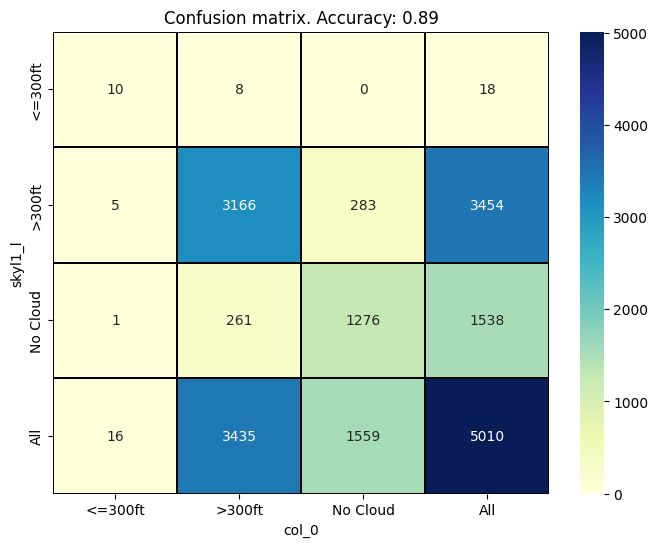

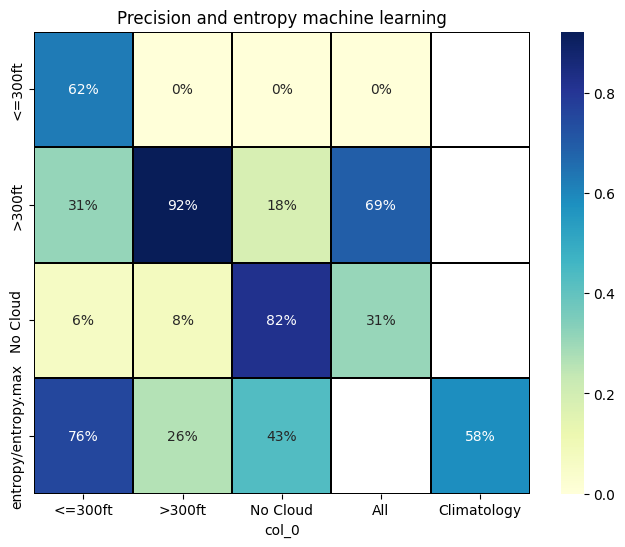

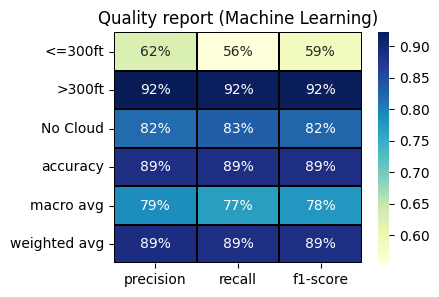

feature feature_per
32          rh1        4.0%
51        month        3.7%
53   weekofyear        3.6%
52    dayofyear        3.2%
33  visibility1        2.8%
24        T8500        2.8%
34       lhflx1        2.7%
49        T8501        2.7%
31        temp1        2.7%
8   visibility0        2.6%

Round 8


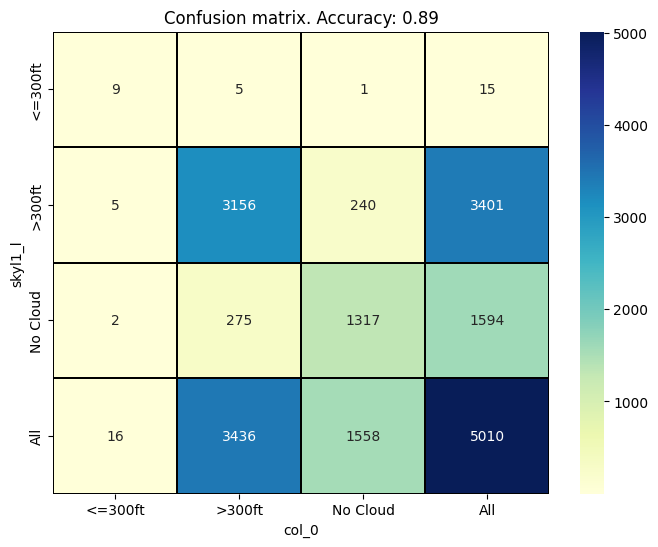

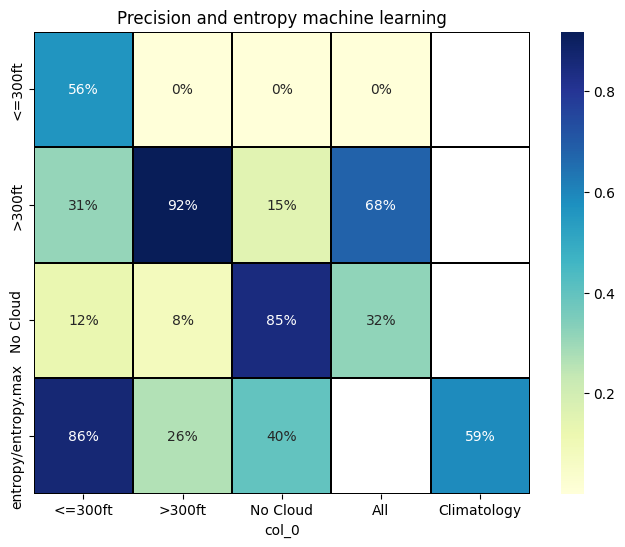

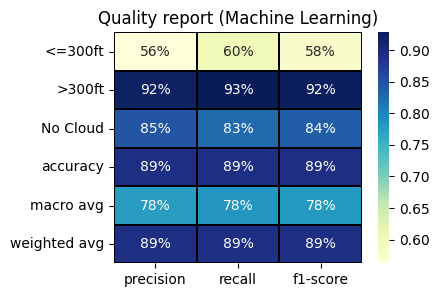

feature feature_per
51        month        4.1%
32          rh1        4.0%
53   weekofyear        3.3%
34       lhflx1        3.2%
52    dayofyear        3.1%
7           rh0        3.0%
33  visibility1        2.7%
49        T8501        2.6%
35       lwflx1        2.6%
24        T8500        2.6%

Round 9


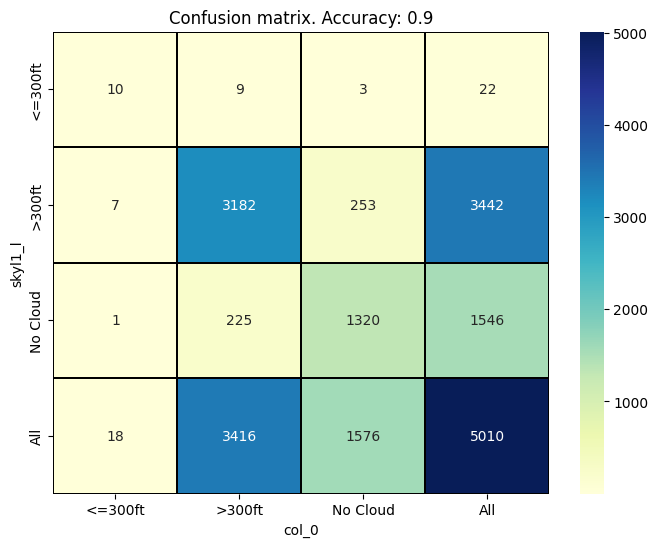

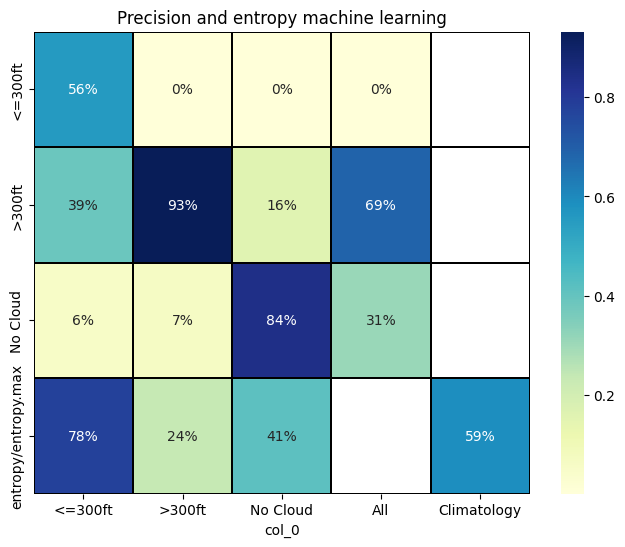

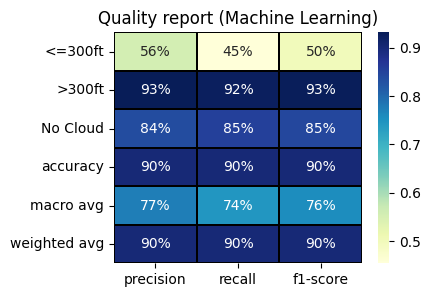

feature feature_per
52    dayofyear        4.2%
33  visibility1        3.9%
51        month        3.6%
32          rh1        3.6%
53   weekofyear        3.4%
34       lhflx1        3.1%
49        T8501        2.7%
24        T8500        2.7%
21      HGT5000        2.6%
46      HGT5001        2.6%


Accuracy stadistics
        Accuracy
count  10.000000
mean    0.890000
std     0.004714
min     0.880000
25%     0.890000
50%     0.890000
75%     0.890000
max     0.900000
Shapiro test normality
p value: 0.00027618114836513996
Reject null Hypothesis. Alternative hypothesis variable HSS no normal distribution in samples
chi2_contingency last round
p-value: 5.425251843337775e-195
Significance level: 0.01
Degres of of freedom:  1
Stadistic 887.3839496671101
Reject H0,There is an association between machine learning forecast and observed values
Execution time: 1.23 minutes


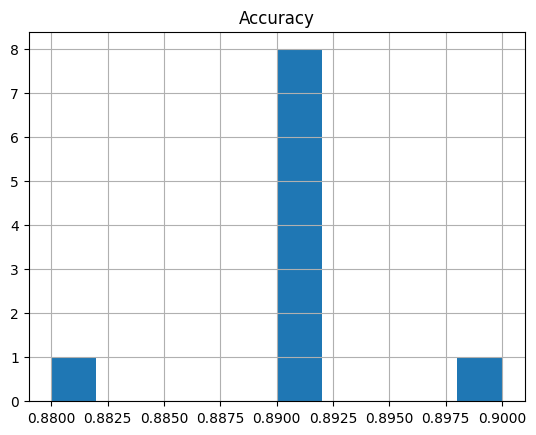

In [6]:
#@title ML RandomForestClassifier. Samples 10. Heidke Skill score.
from lightgbm.sklearn import LGBMClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.tree import ExtraTreeClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
from scipy.stats import shapiro
import math
from scipy.stats import entropy
from sklearn.metrics import accuracy_score

start_time = time.time()

#random seed 1
np.random.seed(31)

# X and Y
Y = df_all.skyl1_l
X = df_all.iloc[:,1:]




# loop random
acc_ml = []
for t in range (0,10):
  print("Round",t)
  #split variables
  X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, )

  # Resample
  X_res, y_res = SMOTE().fit_resample(X_train,y_train)

  #train model
  #ml_model = LGBMClassifier(n_estimators=200).fit(X_res,y_res)
  ml_model = ExtraTreesClassifier().fit(X_res,y_res)
  #ml_model = Perceptron().fit(X_res,y_res)
  #ml_model = RandomForestClassifier().fit(X_res,y_res)
  y_pred = ml_model.predict(X_test)
  acc_ml.append(round(accuracy_score(y_test, y_pred),2))
  #Confusion matrix
  cm = pd.crosstab(y_test, ml_model.predict(X_test),margins=True,)

  plt.figure(figsize=(8, 6))
  plt.title("Confusion matrix. Accuracy: {}".format(round(acc_ml[t],2)))
  seab = sns.heatmap(cm,annot=True,cmap="YlGnBu",fmt='.0f',linewidths=.2,linecolor='black');
  plt.show()

  #Precision and entropy
  plt.figure(figsize=(8, 6))
  plt.title("Precision and entropy machine learning")

  column_sc = pd.crosstab(y_test, ml_model.predict(X_test), margins=True,normalize="columns")
  entropy_values = pd.DataFrame(
    entropy(column_sc, base=2) / (math.log2(column_sc.shape[0])),
    columns=["entropy/entropy.max"],
    index=column_sc.columns).T
  column_sc = pd.concat([column_sc, entropy_values.rename(columns={"All": "Climatology"})])
  seab = sns.heatmap(column_sc,annot=True,cmap="YlGnBu",fmt='.0%',linewidths=.2,linecolor='black');
  plt.show()

  #quality report
  plt.figure(figsize=(4, 3))
  plt.title("Quality report (Machine Learning)")
  qr = pd.DataFrame(classification_report(y_test, ml_model.predict(X_test),output_dict=True)).T
  seab = sns.heatmap(qr.iloc[:,:-1],annot=True,cmap="YlGnBu",fmt='.0%',linewidths=.2,linecolor='black');
  plt.show()

  #feature importance
  def format_as_percentage(value):
      return '{:.1%}'.format(value)
  fea_imp =pd.DataFrame({"feature":X.columns,
                      "importance":[(importance/(sum(ml_model.feature_importances_))) for importance in ml_model.feature_importances_]})
  fea_imp["feature_per"] =  fea_imp['importance'].map(format_as_percentage)
  fea_sort = fea_imp.sort_values(by="importance",ascending=False)
  display(fea_sort[["feature","feature_per"]][:10])



print("\nAccuracy stadistics")
# if p-value is lower than 5%, we can reject the null hypothesis of the normality of the dataset

print(pd.DataFrame(acc_ml,columns=["Accuracy"]).describe())

#sample less 5000
sta, p = shapiro(acc_ml)
print("Shapiro test normality")
print("p value:",p)
#significance level alpha=0.01
alpha = 0.01
if p>alpha:
  print("Accept null hypothesis: normal distribution variable HSS in the samples")
else:
  print("Reject null Hypothesis. Alternative hypothesis variable HSS no normal distribution in samples")



pd.DataFrame(acc_ml,columns=["Accuracy"]).hist();

#stadistic(sta), pvalue (p), degrees of freedom (dof) and expected values (exp)
print("chi2_contingency last round")
sta, p, dof, exp = chi2_contingency(cm.iloc[0:2,0:2])

#degrees of freedoom (rows-1)*(columns-1) to test associationbetween two variables
alpha = 0.01
print('p-value:',p)
print('Significance level:',alpha)
print('Degres of of freedom: ',dof)
print("Stadistic",sta)

if p<=alpha:
    print("Reject H0,There is an association between machine learning forecast and observed values")
else:
    print("Retain H0,There is no association between machine learning forecast and observed values")

#time
end_time = time.time()
execution_time = end_time - start_time
print("Execution time:", round(execution_time/60,2), "minutes")








In [7]:
#@title Save last heavy algorithm round 9
x_var = X.columns
score = {"acc_ml":acc_ml[-1]}
estimators = [('ml_model', ml_model)]
pipe = Pipeline(estimators)

al_file={"x_var":x_var,"coor":coor,"pipe":pipe,"score":score}
#pickle.dump(al_file, open("/content/drive/MyDrive/Colab Notebooks/LEBL/algorithms/skyl1_LEBL_d0.al", 'wb'))

Round 0


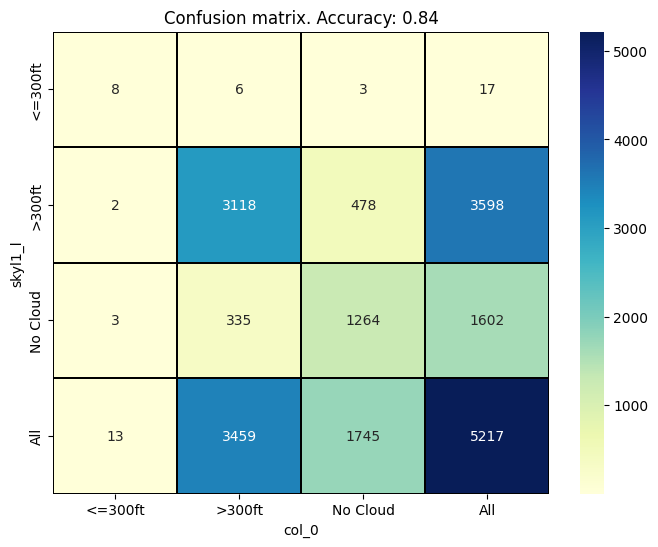

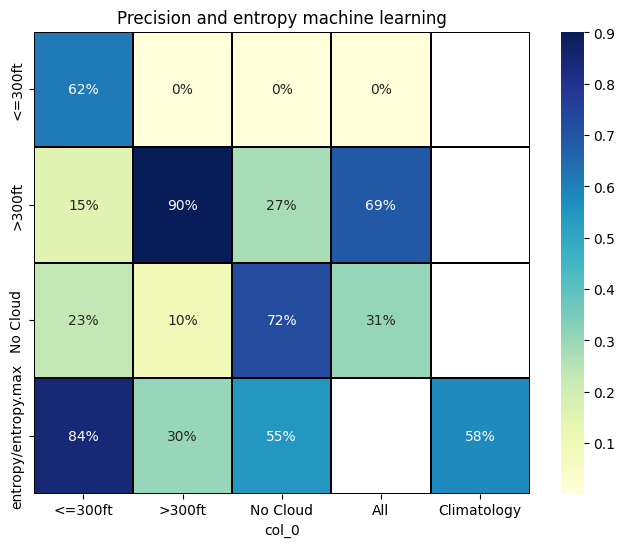

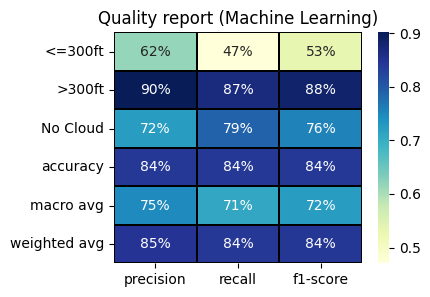

feature feature_per
52    dayofyear        5.1%
39       shflx1        3.5%
8   visibility0        3.1%
50         hour        3.0%
32          rh1        3.0%
31        temp1        3.0%
24        T8500        2.9%
34       lhflx1        2.7%
41         cin1        2.6%
25         dir1        2.6%

Round 1


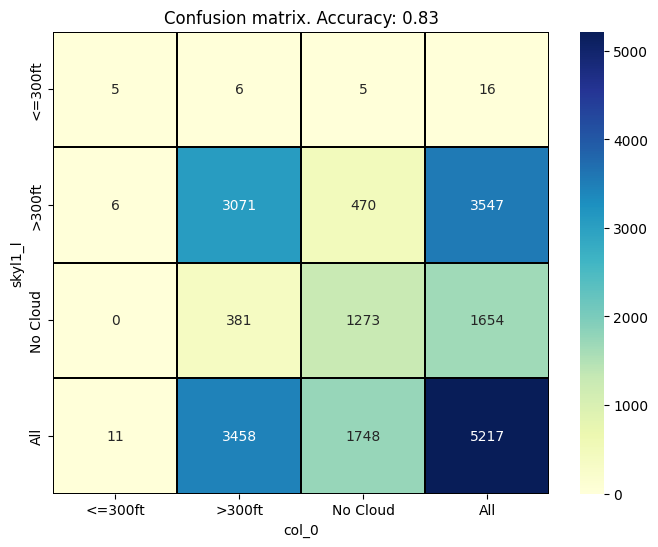

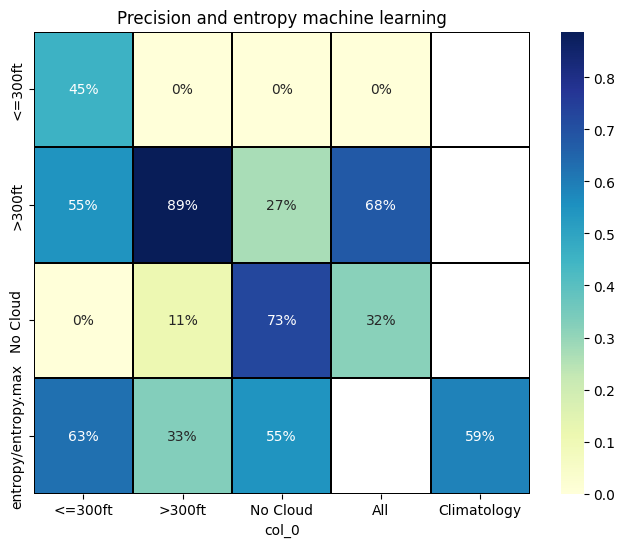

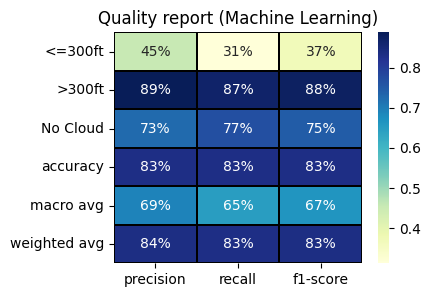

feature feature_per
52    dayofyear        5.1%
32          rh1        3.1%
34       lhflx1        3.1%
39       shflx1        3.1%
8   visibility0        3.1%
50         hour        3.0%
23        T5000        2.7%
41         cin1        2.7%
5         mslp0        2.7%
4    wind_gust0        2.6%

Round 2


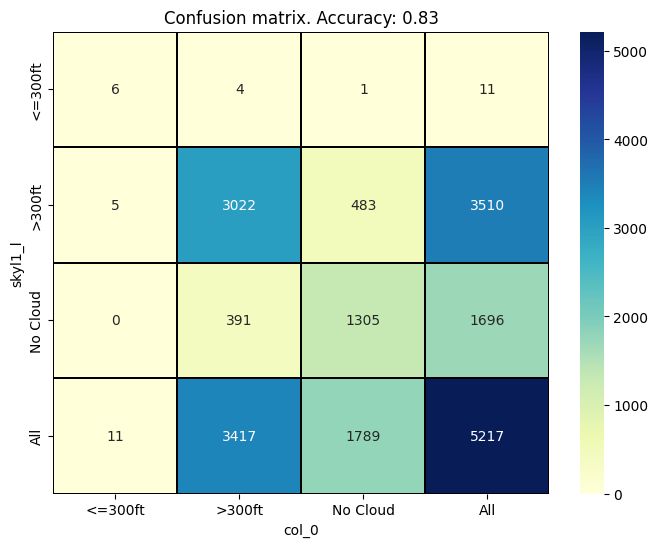

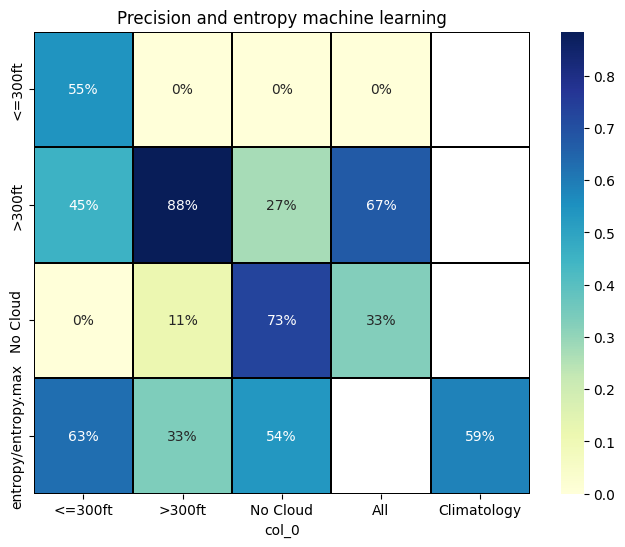

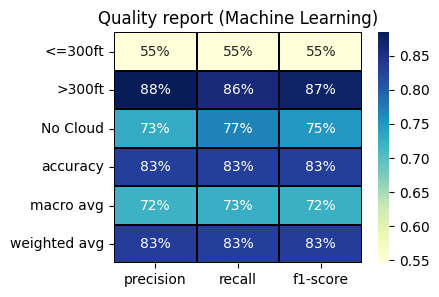

feature feature_per
52    dayofyear        4.7%
39       shflx1        3.9%
31        temp1        3.5%
50         hour        3.5%
34       lhflx1        3.1%
8   visibility0        3.1%
24        T8500        2.9%
32          rh1        2.8%
25         dir1        2.7%
35       lwflx1        2.7%

Round 3


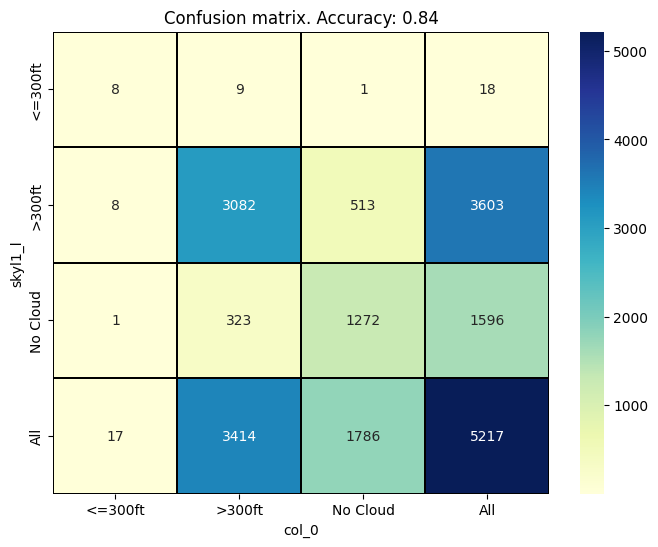

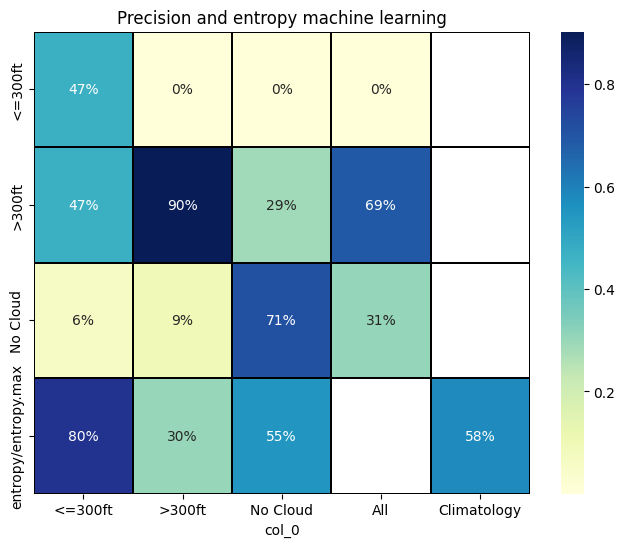

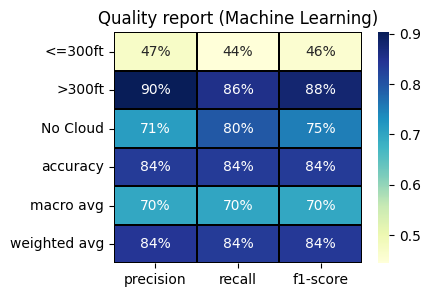

feature feature_per
52    dayofyear        5.1%
39       shflx1        3.5%
32          rh1        3.1%
8   visibility0        3.1%
31        temp1        3.0%
34       lhflx1        3.0%
50         hour        3.0%
24        T8500        2.9%
41         cin1        2.8%
0          dir0        2.8%

Round 4


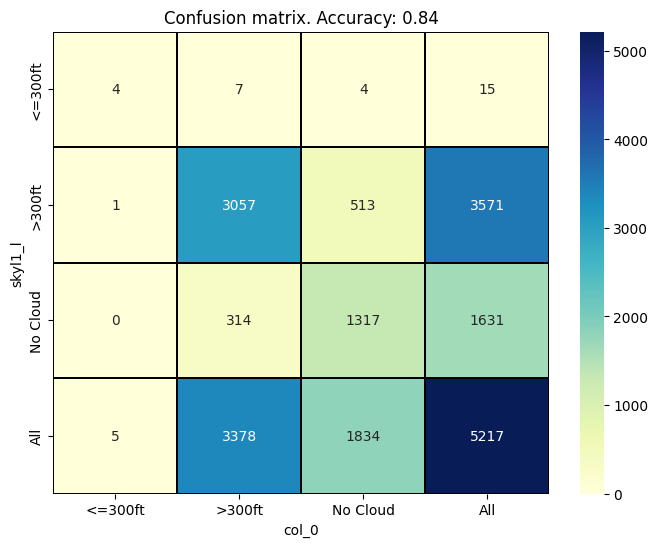

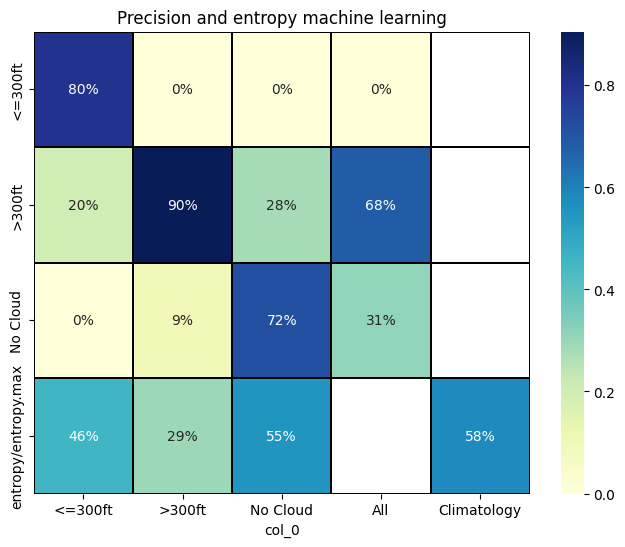

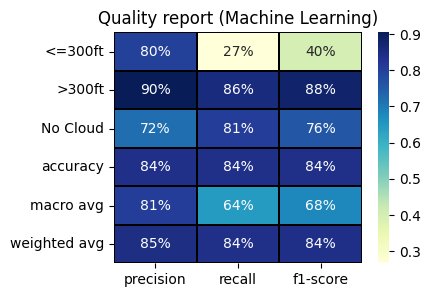

feature feature_per
52    dayofyear        5.4%
50         hour        3.8%
39       shflx1        3.6%
34       lhflx1        3.4%
31        temp1        3.4%
25         dir1        3.1%
32          rh1        3.0%
8   visibility0        2.8%
24        T8500        2.8%
21      HGT5000        2.7%

Round 5


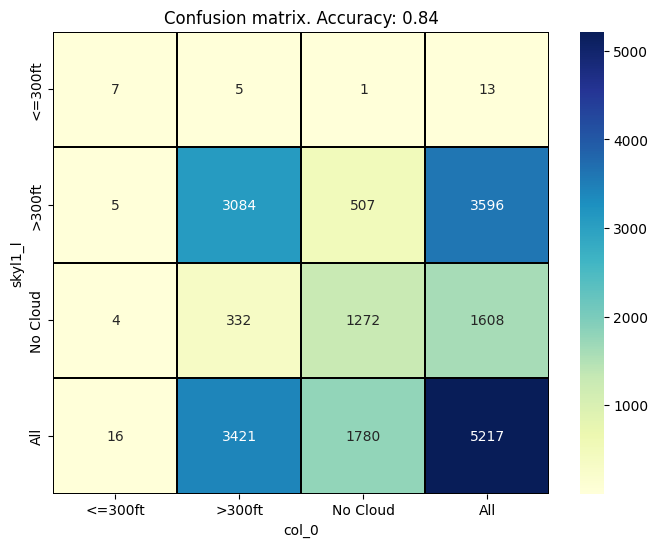

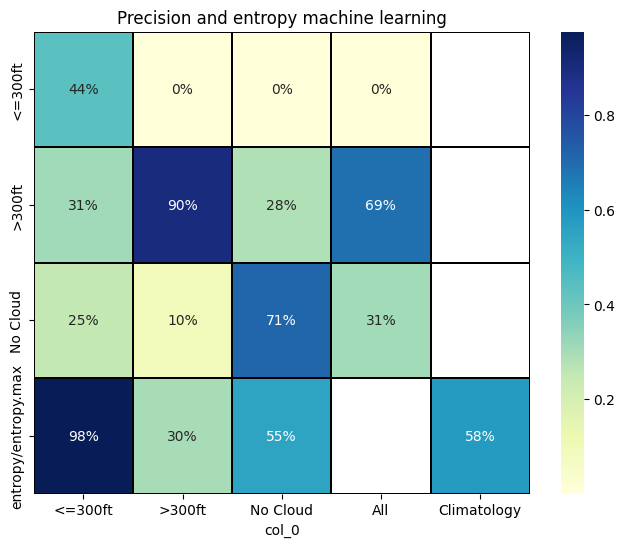

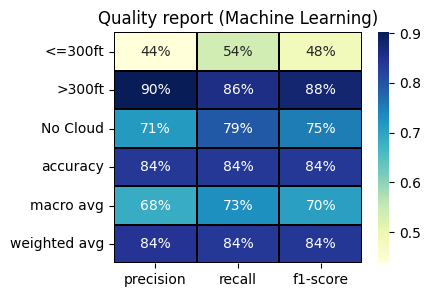

feature feature_per
52    dayofyear        5.0%
34       lhflx1        3.8%
50         hour        3.3%
39       shflx1        3.2%
32          rh1        3.0%
8   visibility0        2.9%
24        T8500        2.9%
31        temp1        2.8%
25         dir1        2.8%
5         mslp0        2.7%

Round 6


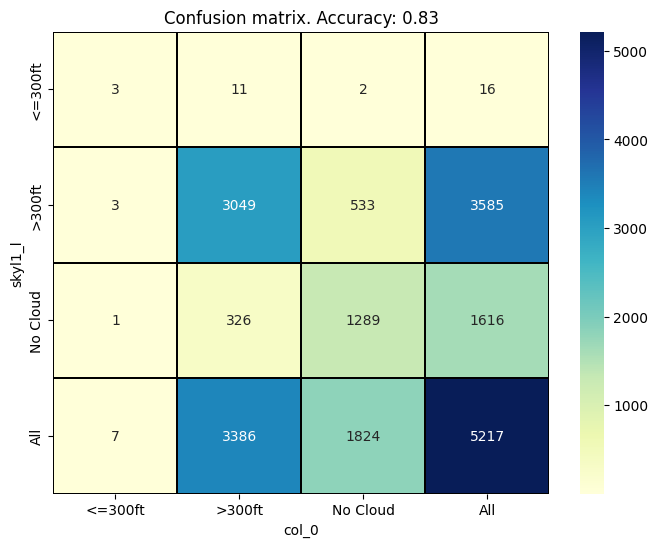

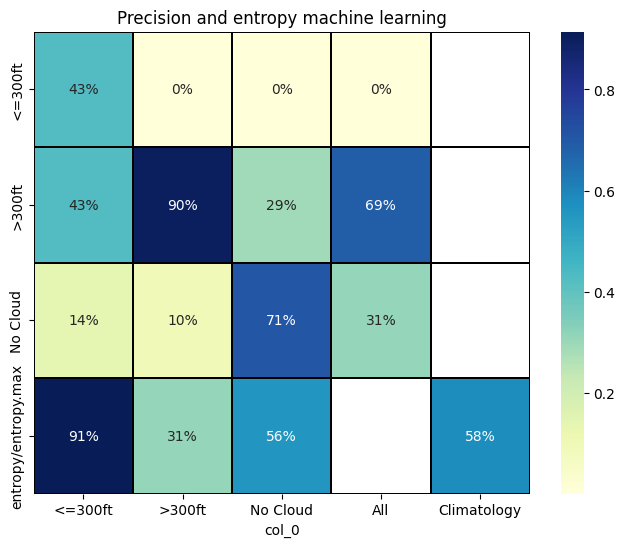

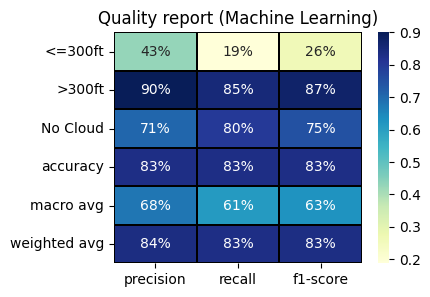

feature feature_per
52    dayofyear        5.0%
39       shflx1        3.6%
50         hour        3.1%
32          rh1        3.0%
34       lhflx1        2.9%
41         cin1        2.8%
0          dir0        2.8%
25         dir1        2.8%
33  visibility1        2.8%
5         mslp0        2.7%

Round 7


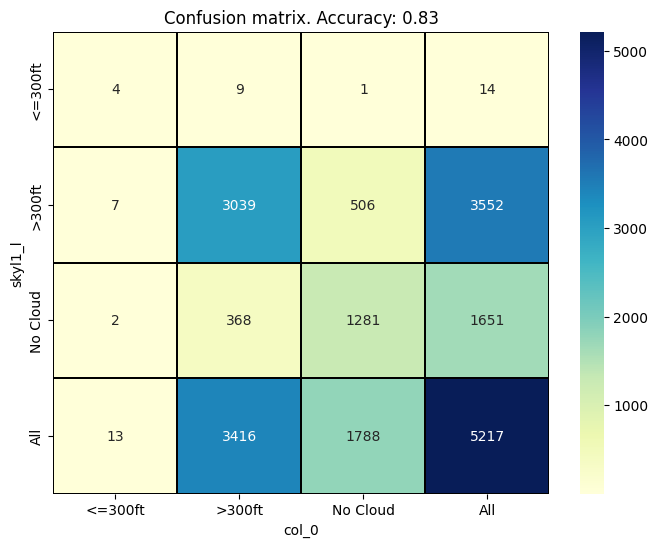

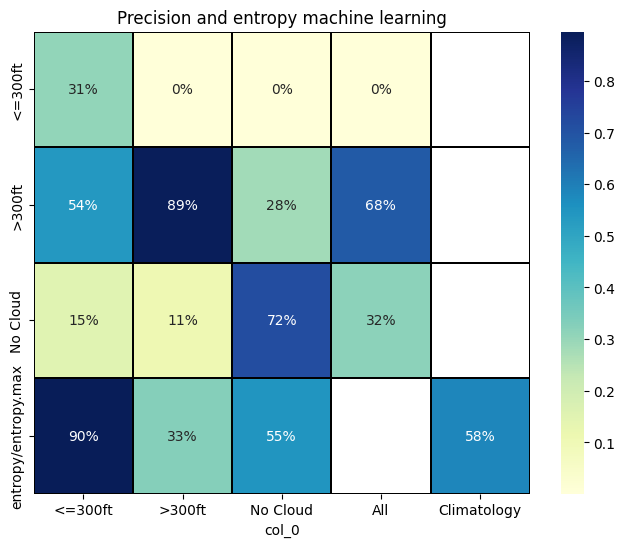

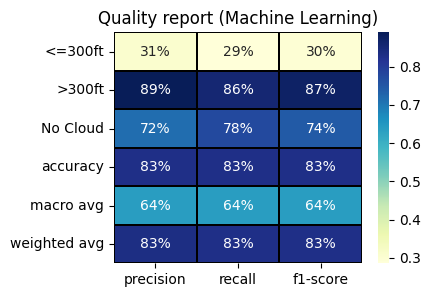

feature feature_per
52    dayofyear        5.1%
39       shflx1        3.9%
34       lhflx1        3.3%
50         hour        3.2%
31        temp1        3.1%
32          rh1        3.1%
25         dir1        3.0%
8   visibility0        2.8%
24        T8500        2.8%
21      HGT5000        2.8%

Round 8


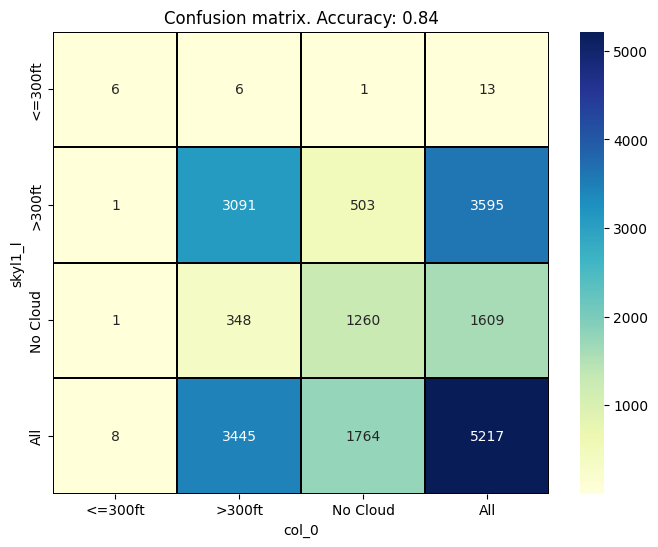

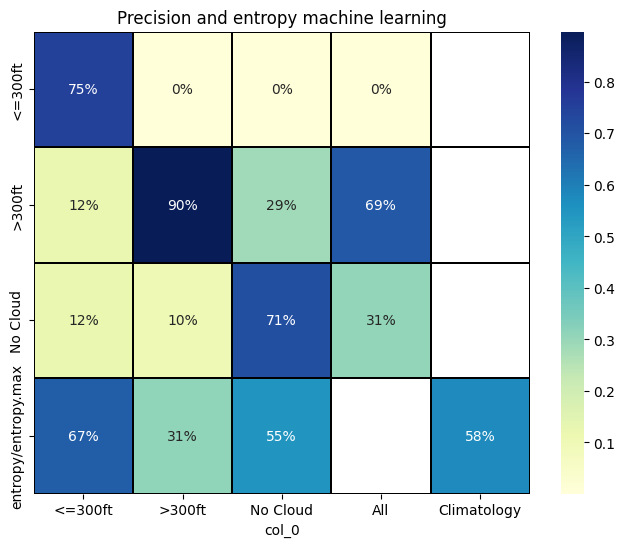

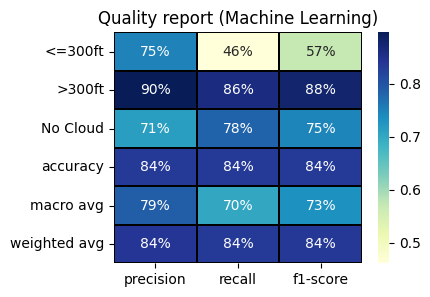

feature feature_per
52    dayofyear        4.4%
8   visibility0        3.5%
39       shflx1        3.4%
50         hour        3.2%
34       lhflx1        3.1%
32          rh1        3.0%
31        temp1        2.9%
24        T8500        2.9%
23        T5000        2.7%
5         mslp0        2.7%

Round 9


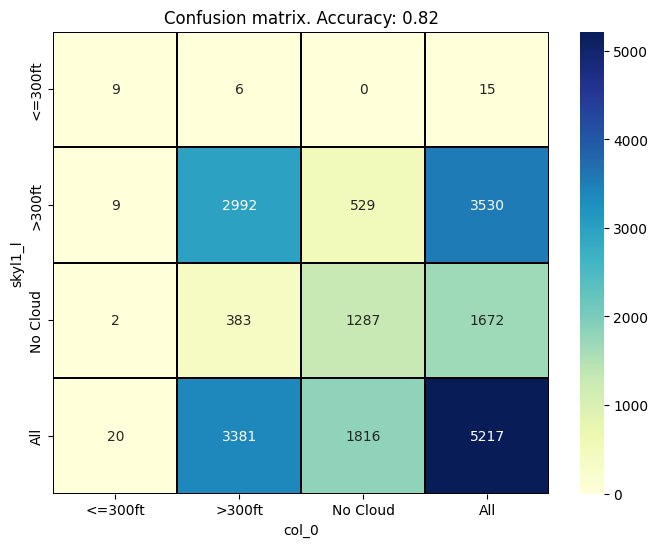

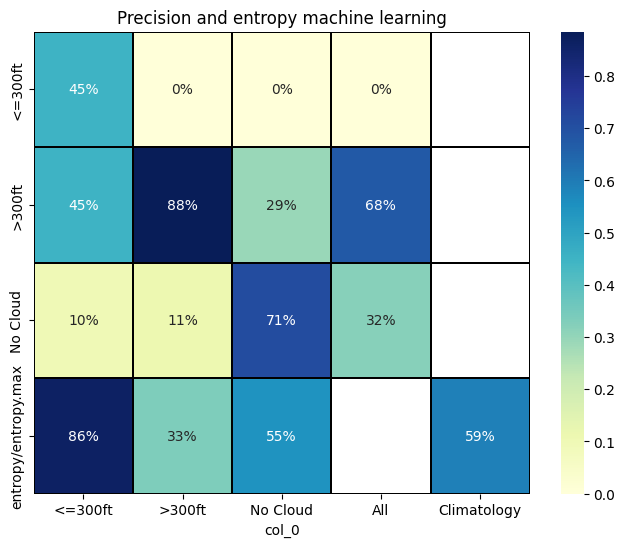

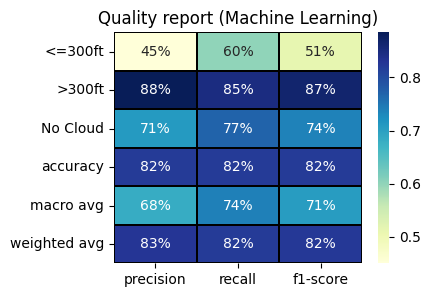

feature feature_per
52    dayofyear        4.7%
39       shflx1        3.7%
50         hour        3.4%
31        temp1        3.1%
34       lhflx1        3.0%
8   visibility0        3.0%
24        T8500        2.9%
25         dir1        2.9%
23        T5000        2.7%
32          rh1        2.7%


Accuracy stadistics
        Accuracy
count  10.000000
mean    0.834000
std     0.006992
min     0.820000
25%     0.830000
50%     0.835000
75%     0.840000
max     0.840000
Shapiro test normality
p value: 0.008489025756716728
Reject null Hypothesis. Alternative hypothesis variable HSS no normal distribution in samples
chi2_contingency last round
p-value: 9.519592407271483e-176
Significance level: 0.01
Degres of of freedom:  1
Stadistic 798.8659770061738
Reject H0,There is an association between machine learning forecast and observed values
Execution time: 1.38 minutes


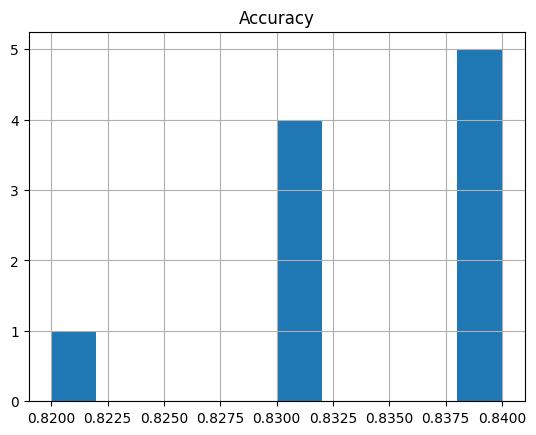

In [8]:
#@title Load meteorological model forecast D1. ML LGBMClassifier. Samples 10. Heidke Skill score.
#Load
mody2018 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LEBL/input_files/lat41.296lon2.078p2R12KmD1Y2018.csv",parse_dates=["time"])
mody2019 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LEBL/input_files/lat41.296lon2.078p2R12KmD1Y2019.csv",parse_dates=["time"])
mody2020 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LEBL/input_files/lat41.296lon2.078p2R12KmD1Y2020.csv",parse_dates=["time"])

model = pd.concat([mody2018,mody2019,mody2020]).drop(columns=["Unnamed: 0"]).set_index("time")

#concat station file versus meteorological model file same time
df_all = pd.concat([station,model],axis=1).drop(columns=["skyl1_o"]).dropna()


start_time = time.time()

df_all["hour"] = df_all.index.hour
df_all["month"] = df_all.index.month
df_all["dayofyear"] = df_all.index.dayofyear
df_all["weekofyear"] = df_all.index.isocalendar().week.astype(int)

#random seed 1
np.random.seed(31)

# X and Y
Y = df_all.skyl1_l
X = df_all.iloc[:,1:]


# loop random
acc_ml = []
for t in range (0,10):
  print("Round",t)
  #split variables
  X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, )

  # Resample
  X_res, y_res = SMOTE().fit_resample(X_train,y_train)

  #train model
  ml_model = LGBMClassifier(n_estimators=200).fit(X_res,y_res)
  y_pred = ml_model.predict(X_test)
  acc_ml.append(round(accuracy_score(y_test, y_pred),2))
  #Confusion matrix
  cm = pd.crosstab(y_test, ml_model.predict(X_test),margins=True,)

  plt.figure(figsize=(8, 6))
  plt.title("Confusion matrix. Accuracy: {}".format(round(acc_ml[t],2)))
  seab = sns.heatmap(cm,annot=True,cmap="YlGnBu",fmt='.0f',linewidths=.2,linecolor='black');
  plt.show()

  #Precision and entropy
  plt.figure(figsize=(8, 6))
  plt.title("Precision and entropy machine learning")

  column_sc = pd.crosstab(y_test, ml_model.predict(X_test), margins=True,normalize="columns")
  entropy_values = pd.DataFrame(
    entropy(column_sc, base=2) / (math.log2(column_sc.shape[0])),
    columns=["entropy/entropy.max"],
    index=column_sc.columns).T
  column_sc = pd.concat([column_sc, entropy_values.rename(columns={"All": "Climatology"})])
  seab = sns.heatmap(column_sc,annot=True,cmap="YlGnBu",fmt='.0%',linewidths=.2,linecolor='black');
  plt.show()

  #quality report
  plt.figure(figsize=(4, 3))
  plt.title("Quality report (Machine Learning)")
  qr = pd.DataFrame(classification_report(y_test, ml_model.predict(X_test),output_dict=True)).T
  seab = sns.heatmap(qr.iloc[:,:-1],annot=True,cmap="YlGnBu",fmt='.0%',linewidths=.2,linecolor='black');
  plt.show()

  #feature importance
  def format_as_percentage(value):
      return '{:.1%}'.format(value)
  fea_imp =pd.DataFrame({"feature":X.columns,
                      "importance":[(importance/(sum(ml_model.feature_importances_))) for importance in ml_model.feature_importances_]})
  fea_imp["feature_per"] =  fea_imp['importance'].map(format_as_percentage)
  fea_sort = fea_imp.sort_values(by="importance",ascending=False)
  display(fea_sort[["feature","feature_per"]][:10])



print("\nAccuracy stadistics")
# if p-value is lower than 5%, we can reject the null hypothesis of the normality of the dataset

print(pd.DataFrame(acc_ml,columns=["Accuracy"]).describe())

#sample less 5000
sta, p = shapiro(acc_ml)
print("Shapiro test normality")
print("p value:",p)
#significance level alpha=0.01
alpha = 0.01
if p>alpha:
  print("Accept null hypothesis: normal distribution variable HSS in the samples")
else:
  print("Reject null Hypothesis. Alternative hypothesis variable HSS no normal distribution in samples")



pd.DataFrame(acc_ml,columns=["Accuracy"]).hist();

#stadistic(sta), pvalue (p), degrees of freedom (dof) and expected values (exp)
print("chi2_contingency last round")
sta, p, dof, exp = chi2_contingency(cm.iloc[0:2,0:2])

#degrees of freedoom (rows-1)*(columns-1) to test associationbetween two variables
alpha = 0.01
print('p-value:',p)
print('Significance level:',alpha)
print('Degres of of freedom: ',dof)
print("Stadistic",sta)

if p<=alpha:
    print("Reject H0,There is an association between machine learning forecast and observed values")
else:
    print("Retain H0,There is no association between machine learning forecast and observed values")

#time
end_time = time.time()
execution_time = end_time - start_time
print("Execution time:", round(execution_time/60,2), "minutes")


In [9]:
#@title Save last algorithm round 9


x_var = X.columns
score = {"acc_ml":acc_ml[-1]}
estimators = [('ml_model', ml_model)]
pipe = Pipeline(estimators)

al_file={"x_var":x_var,"coor":coor,"pipe":pipe,"score":score}
pickle.dump(al_file, open("/content/drive/MyDrive/Colab Notebooks/LEBL/algorithms/skyl1_LEBL_d1.al", 'wb'))